In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',100)

In [3]:
dpath = 'drive/MyDrive/Seculayer/OSC/data/'
train = pd.read_csv(dpath+'train.csv')
test = pd.read_csv(dpath+'test.csv')
train

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,0,6,0.0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,0.0,1.0,0,0,0,0,8,0,477,0,35,22000,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,0,2945,0.0,0,0,2,13.0,8.0,0.0,16.0,21.0,9.1,12,0.0,0.0,4.0,0,36,0,224,3,0,1163,1,9,5494,0,5,0,0.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,0,13,0.0,0,4,7,NaN,NaN,NaN,NaN,NaN,NaN,415,NaN,0.0,NaN,1,16,7,10,3,1,1175,1,645,9640,2,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,0,2244,NaN,0,0,170,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,0.0,0.0,0,0,0,1,0,0,441,1,11,1313,0,0,0,NaN,0,0.0,0.0,0.0,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [5]:
test

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(train):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(train[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(train[train[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(train[train[item].isnull() == True])/len(train[item])*100,2))
    
for item in dataFeatures:
    minValue.append(train[item].min())

for item in dataFeatures:
    maxValue.append(train[item].max())

for item in dataFeatures:
    unique.append(train[item].nunique())

for item in dataFeatures:
    uniqueSample.append(train[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [ ]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test[test[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test[test[item].isnull() == True])/len(test[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test[item].min())

for item in dataFeatures:
    maxValue.append(test[item].max())

for item in dataFeatures:
    unique.append(test[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


In [ ]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

ID : ID

COMPONENT_ARBITRARY : sample 오일 관련 부품 (Component 4종)

ANONYMOUS_1 : 무명 Feature 1, 수치형 데이터

YEAR : 오일 진단 년도(Year)

SAMPLE_TRANSFER_DAY : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)

ANONYMOUS_2 : 무명 Feature 2, 수치형 데이터

AG : 은(Silver) 함유량

AL : 알루미늄(Aluminium) 함유량

B : 붕소(Boron) 함유량

BA : 바륨(Barium) 함유량

BE : 베릴륨(Beryllium) 함유량

CA : 칼슘(Calcium) 함유량

CD : 카드뮴(Cadmium) 함유량

CO : 코발트(Cobolt) 함유량

CR : 크로뮴(Chromium) 함유량

CR : 구리(Copper) 함유량

FH2O : 물(Water) 수치(By FT-IR)

FNOX : 질소산화물(Nox) 수치(By FT-IR)

FOPTIMETHGLY : 비식별화

FOXID : 산화(Oxidation) 수치(By FT-IR)

FSO4 : 황산염(S04) 수치(By FT-IR)

FTBN : 염기성 첨가제물질 수치(By FT-IR)

FE : 철(Iron) 함유량

FUEL : 연료 함유량

H2O : 물 함유량

K : 칼륨(Potassium) 함유량

LI : 리튬(Lithium) 함유량

MG : 마그네슘(Magnesium) 함유량

MN : 망가니즈(Manganese) 함유량

MO : 몰리브덴(Molybdenum) 함유량

NA : 나트륨(Sodium) 함유량

NI : 니켈(Nickel) 함유량

P : 인(Phosphorus) 함유량

PB : 납(Lead) 함유량

PQINDEX : 입자 정량화 지수(Particle Quantifier Index)

S : 황(Sulphur) 함유량

SB : 안티몬(Antimony) 함유량

SI : 규소(Silicone) 함유량

SN : 주석(Tin) 함유량

SOOTPERCENTAGE : 그을음 정도

TI : 티타늄(Titanium) 함유량

U100 : 100㎛ 이상 입자 크기(Particle Count)

U75 : 75㎛ 이상 입자 크기(Particle Count)

U50 : 50㎛ 이상 입자 크기(Particle Count)

U25 : 25㎛ 이상 입자 크기(Particle Count)

U20 : 20㎛ 이상 입자 크기(Particle Count)

U14 : 14㎛ 이상 입자 크기(Particle Count)

U6 : 6㎛ 이상 입자 크기(Particle Count)

U4 : 4㎛ 이상 입자 크기(Particle Count)

V : 바나듐(Vanadium) 함유량

V100 : 점도(Viscosity) @ 100 degrees

V40 : 점도(Viscosity) @ 40 degrees

ZN : 아연(Zinc) 함유량

Y_LABEL : 오일 정상 여부(0 : 정상, 1 : 이상)

In [ ]:
train = train.astype({'Y_LABEL' : 'object'})

In [ ]:
train.isnull().sum()


ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [ ]:
test.isnull().sum()


ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

Train 데이터의 Feature 중 Test 데이터에 존재하지 않는 Feature는 대부분 결측치



In [ ]:
percent20UP = list(train_info[train_info['nullPCT'] >= 20.0]['dataFeatures'])
train = train.drop(percent20UP,axis=1)

In [ ]:
print(train.shape)


(14095, 37)


In [ ]:
percent20UP


['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

In [ ]:
categorical_features = ['ID','COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL']
numerical_features = [i for i in train.columns if i not in categorical_features]
test_features = [i for i in test.columns]

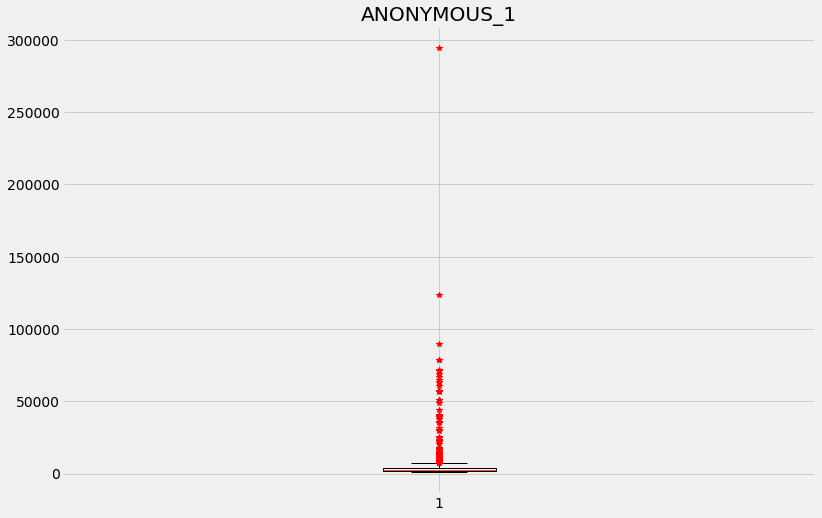

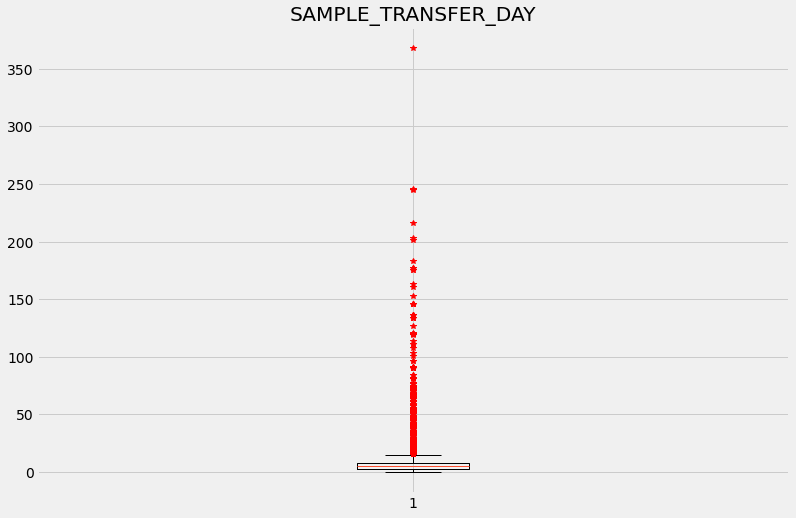

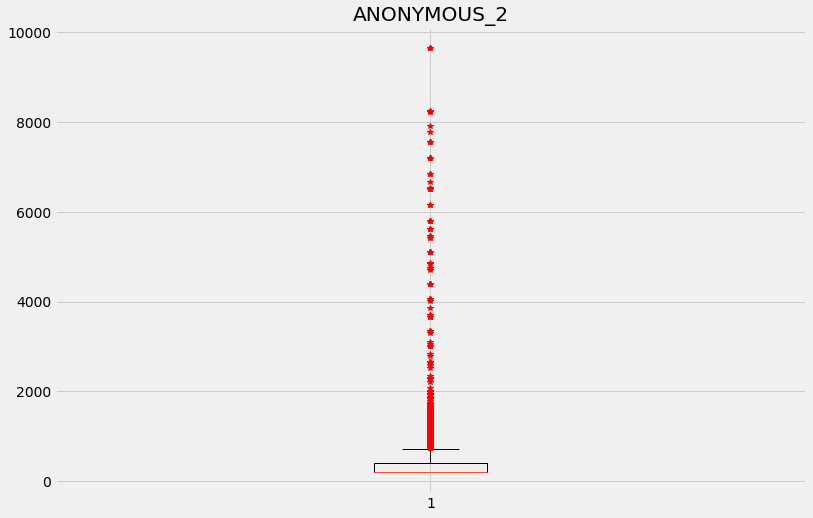

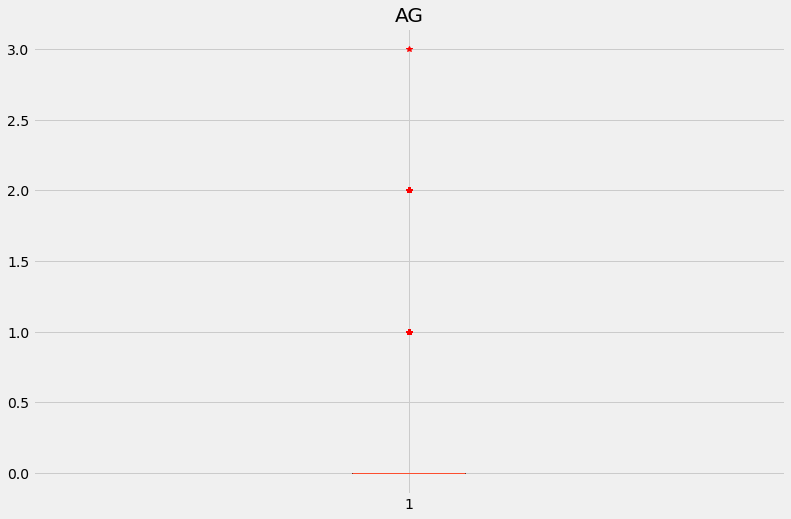

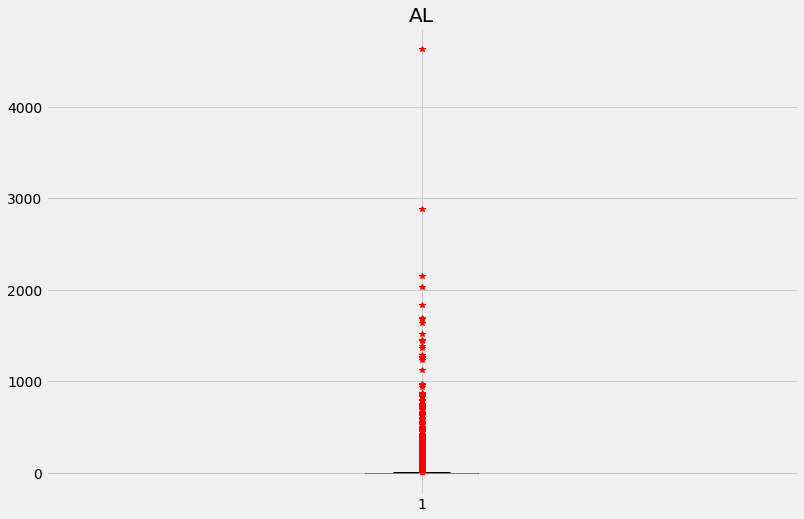

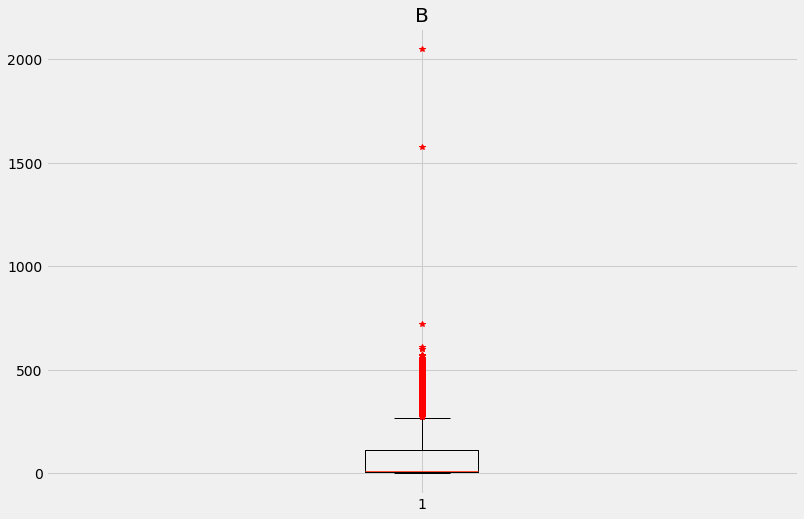

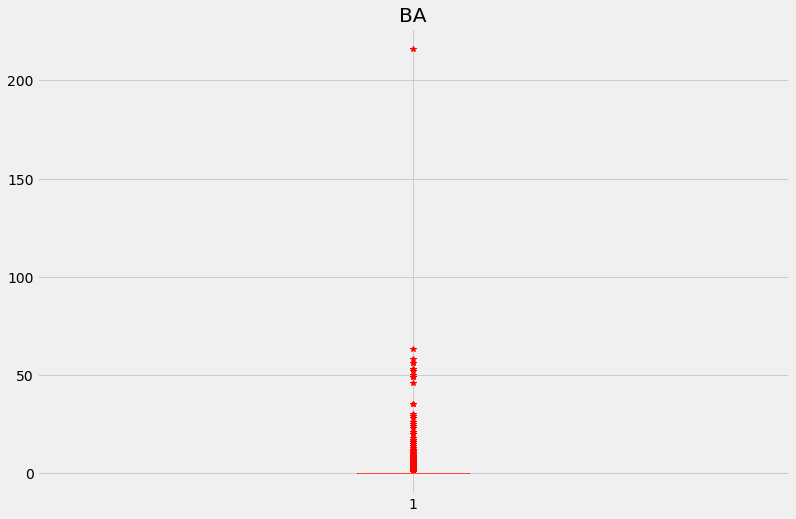

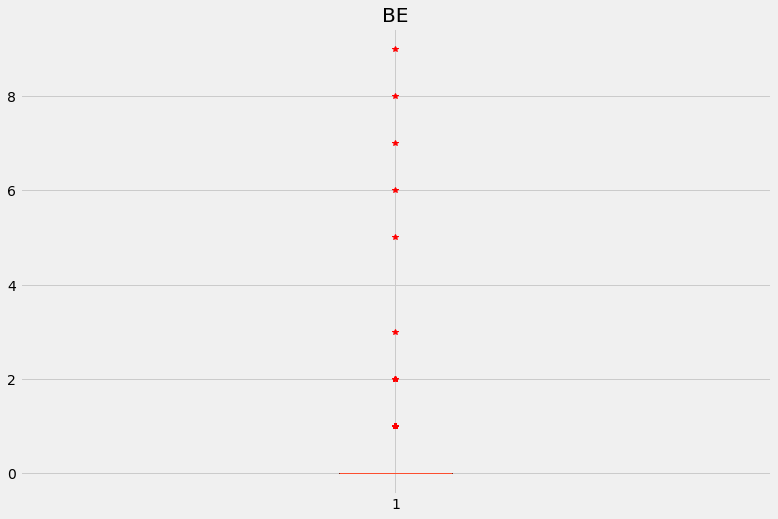

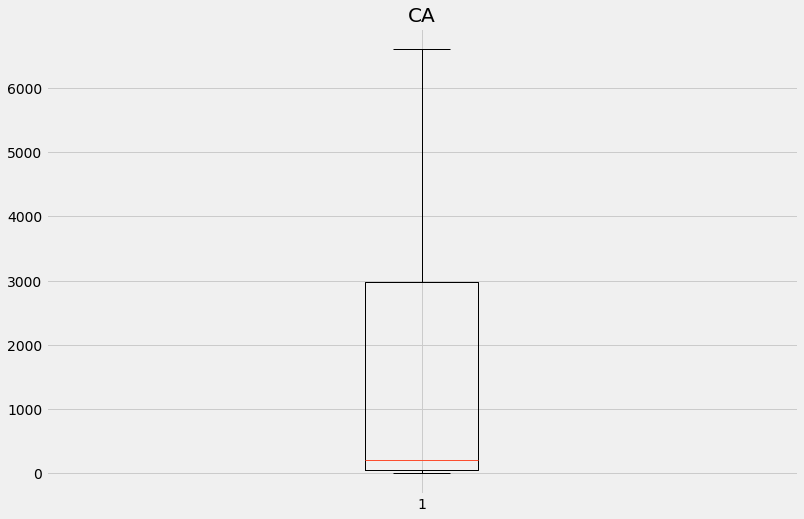

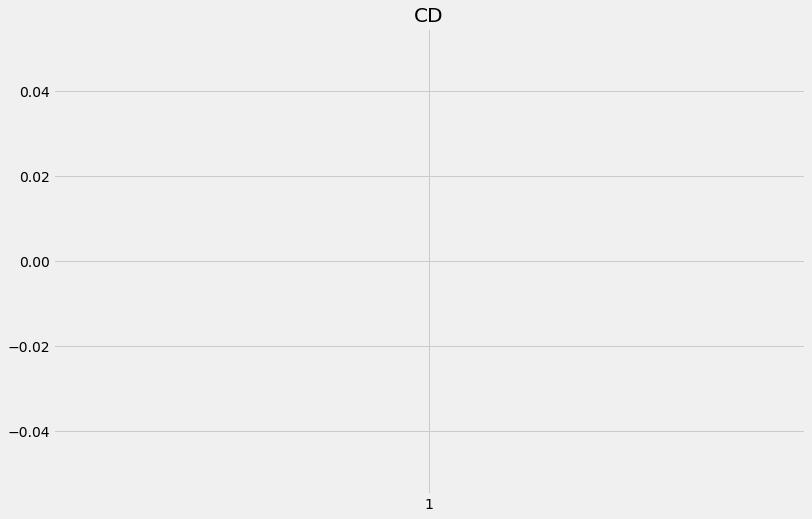

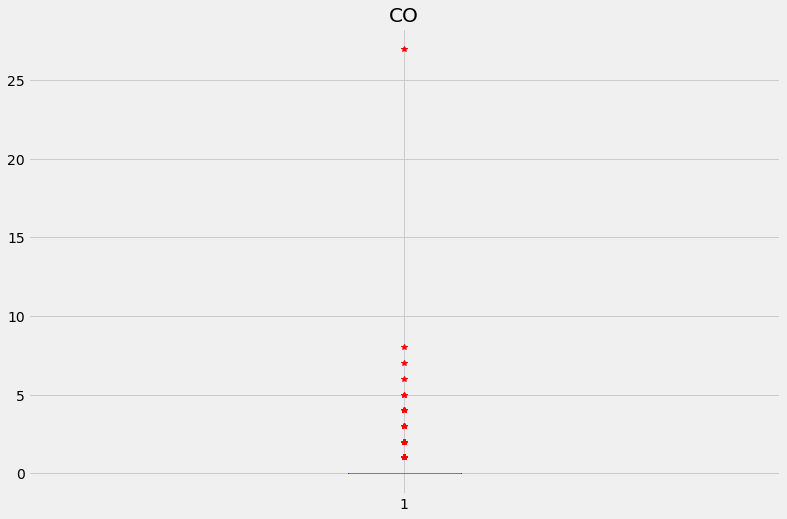

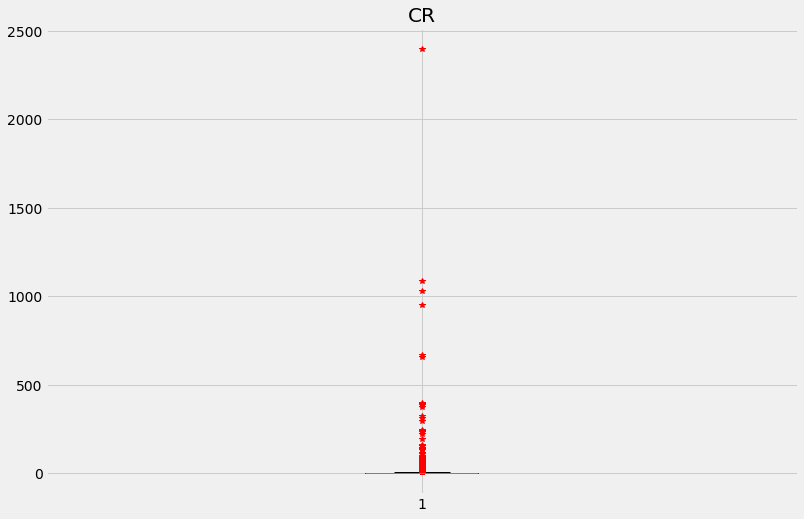

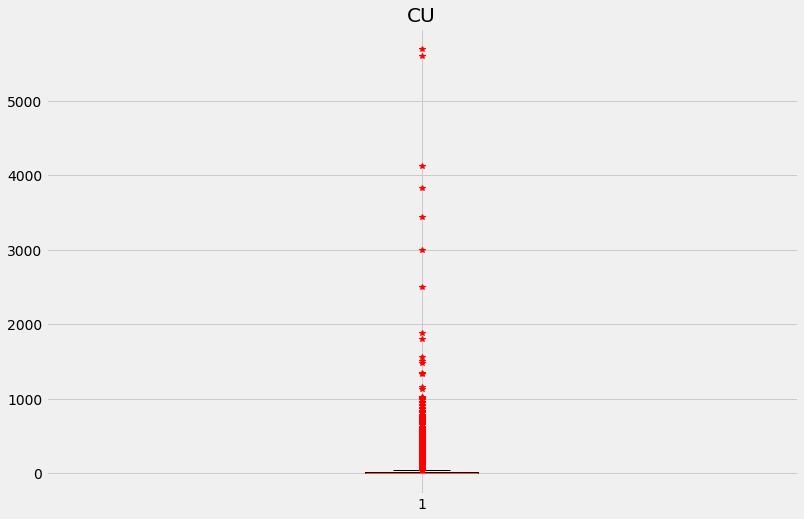

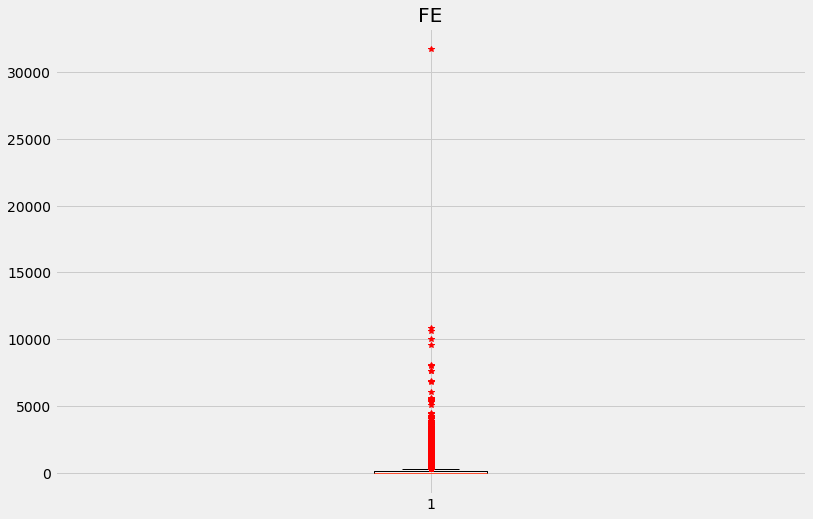

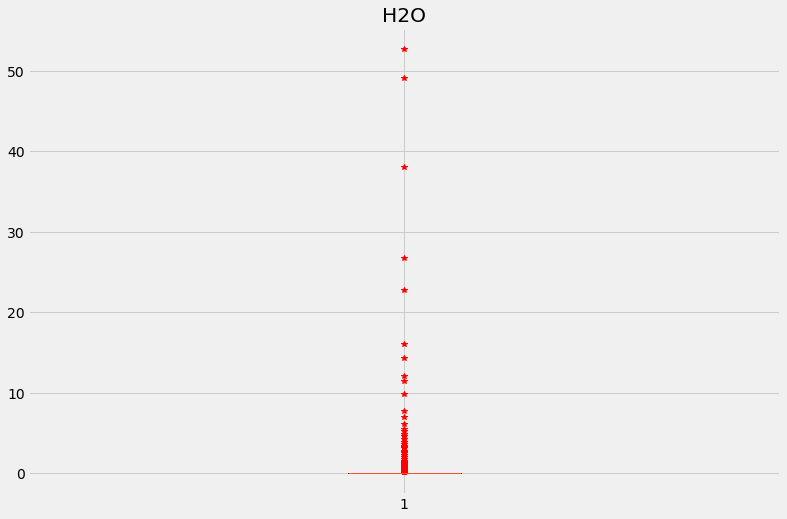

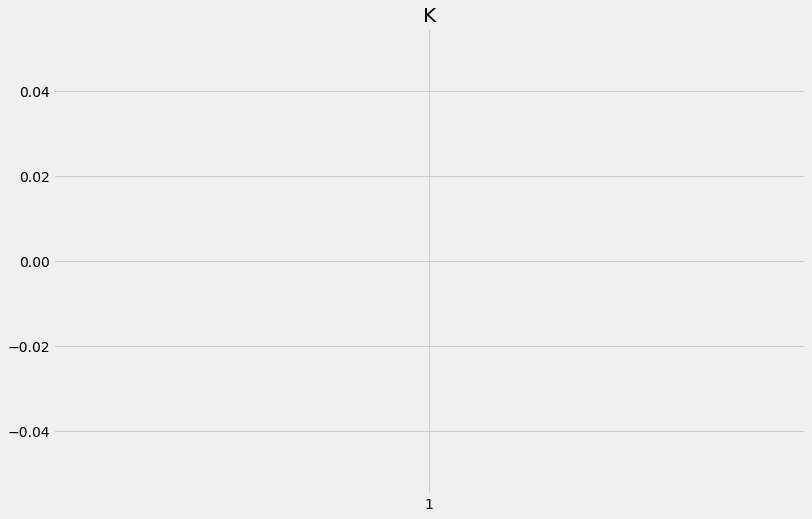

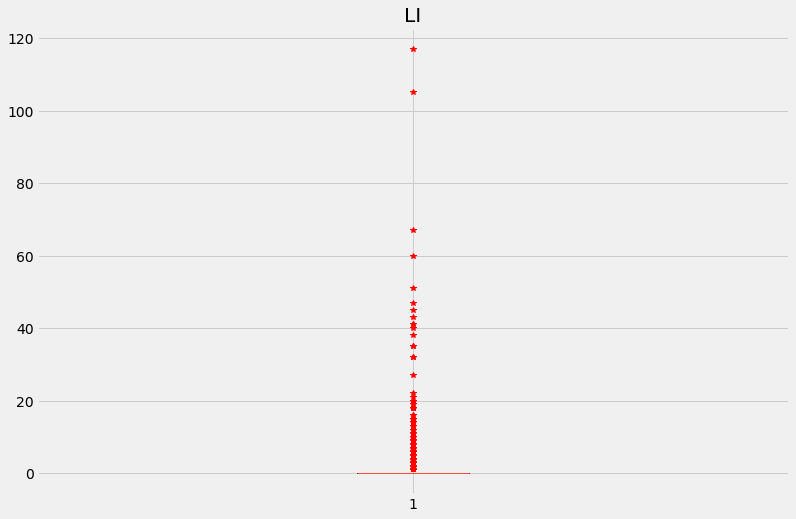

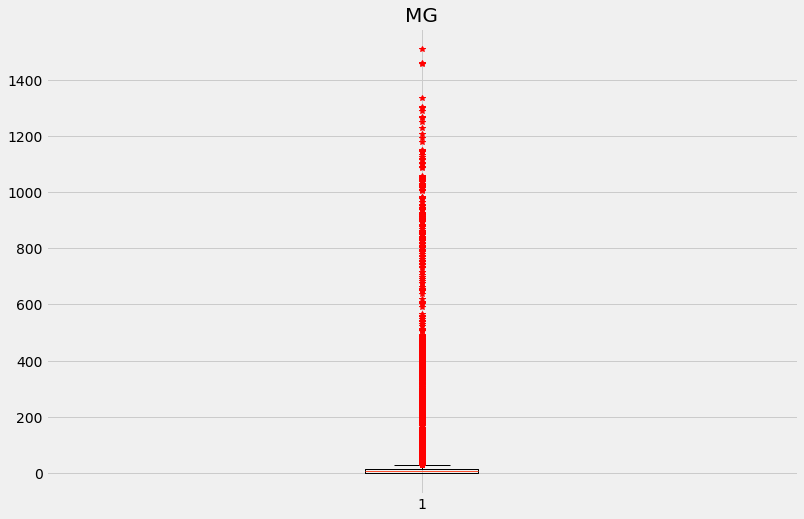

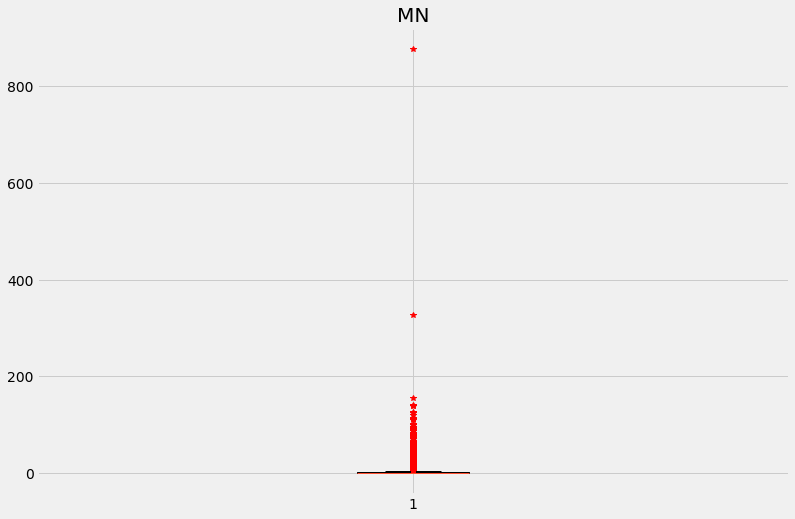

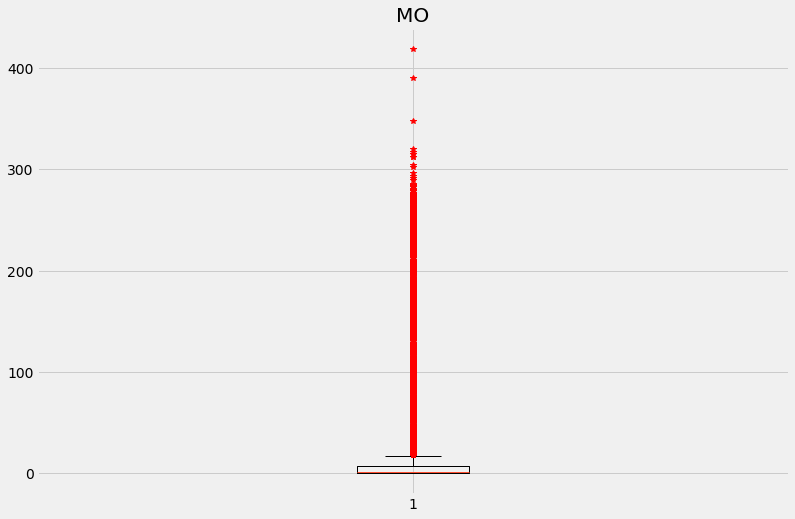

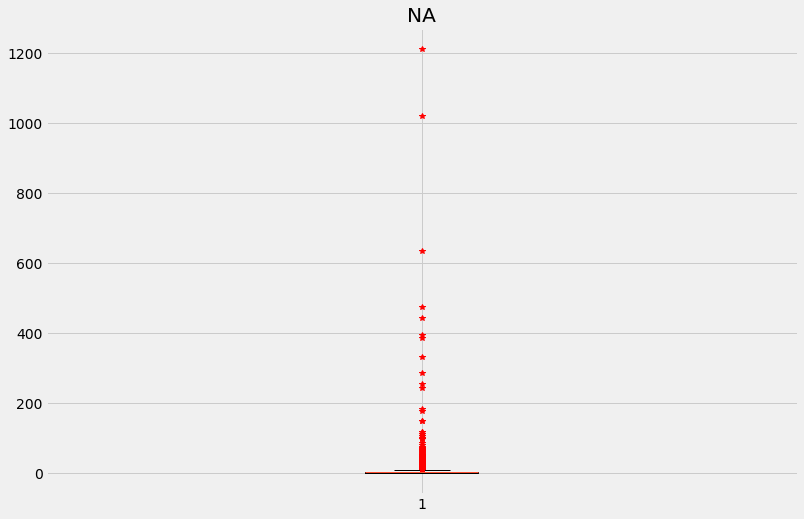

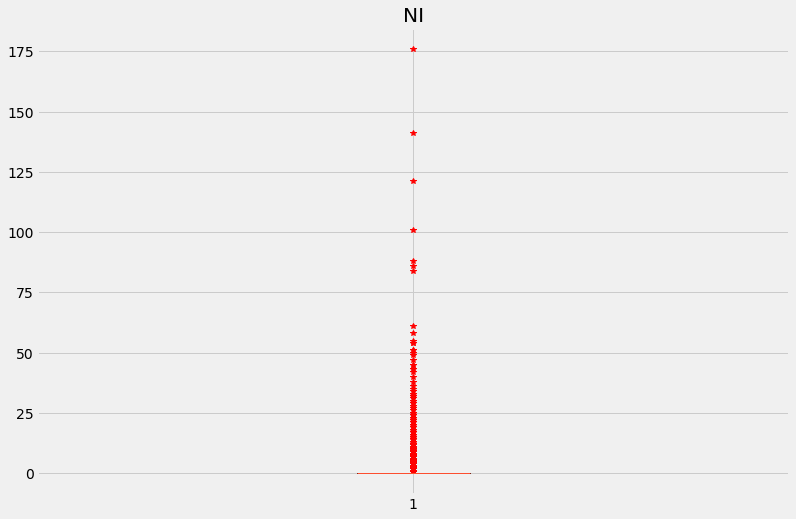

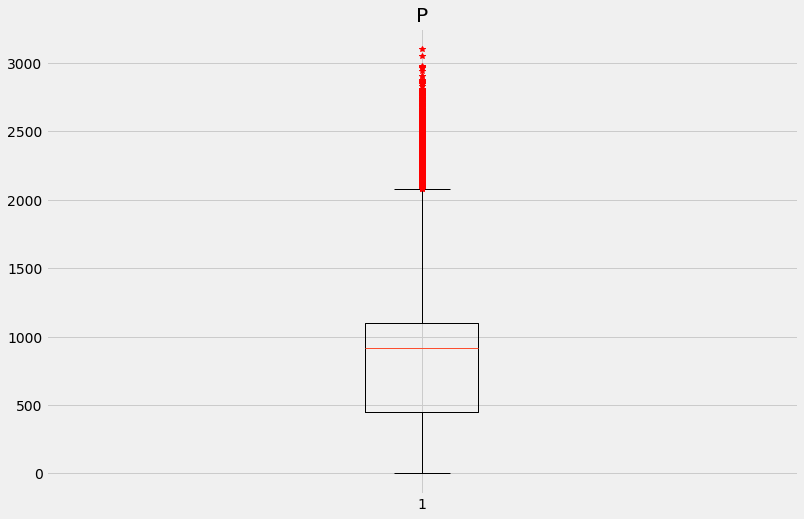

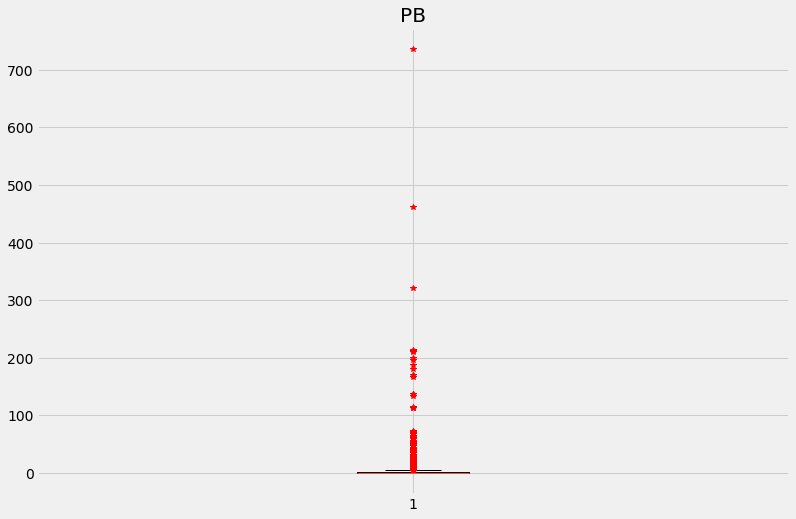

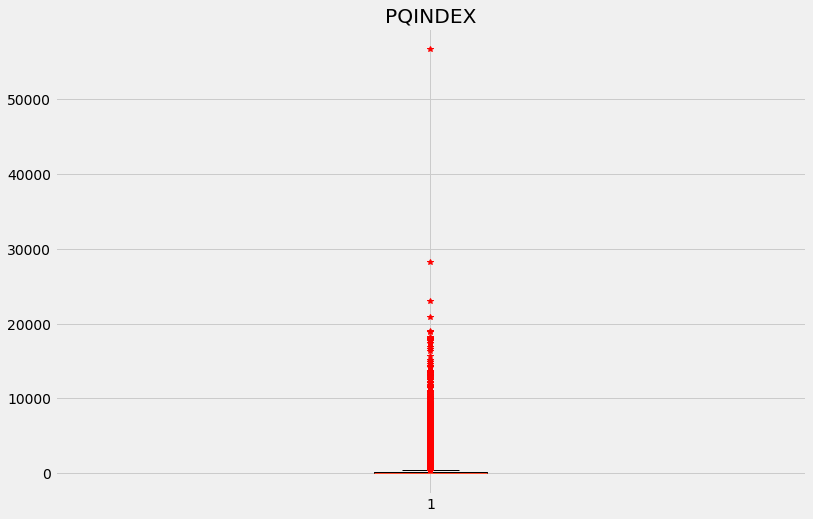

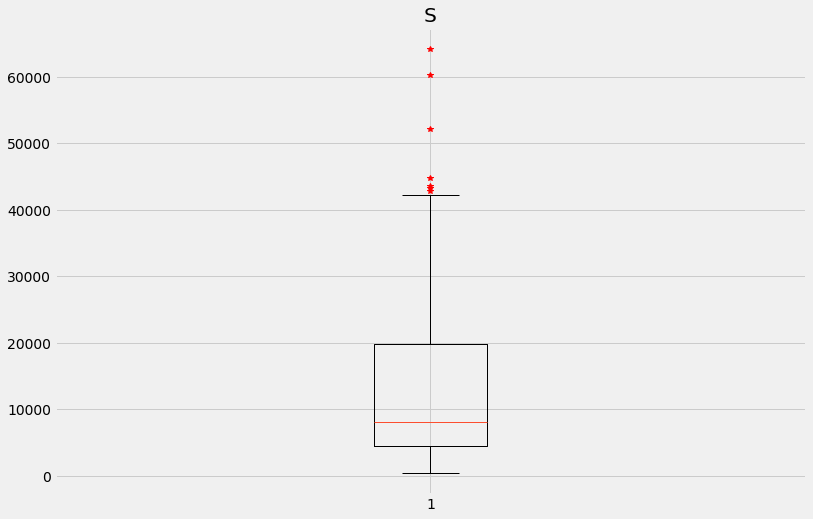

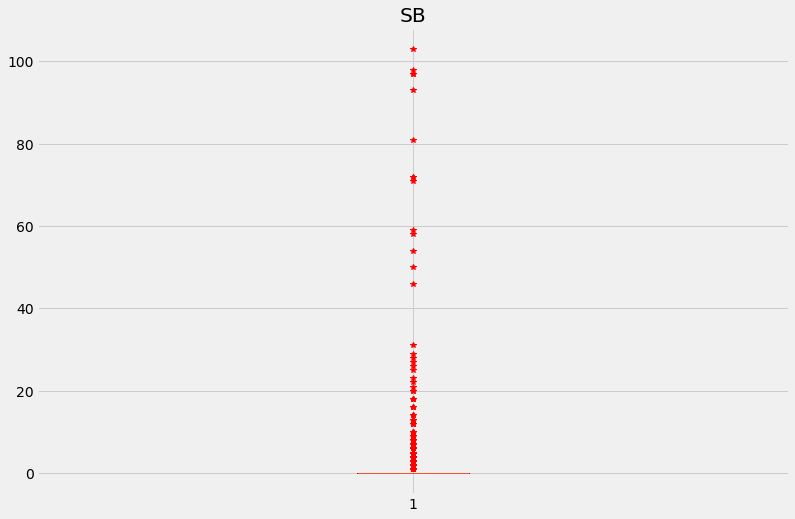

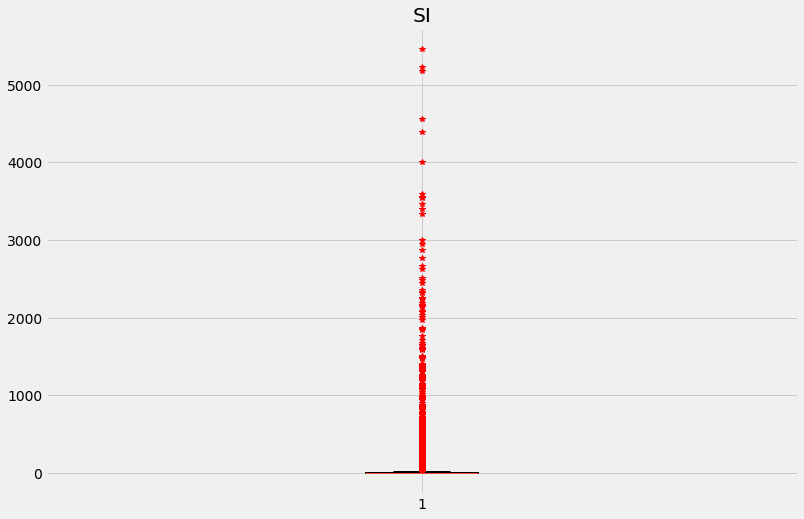

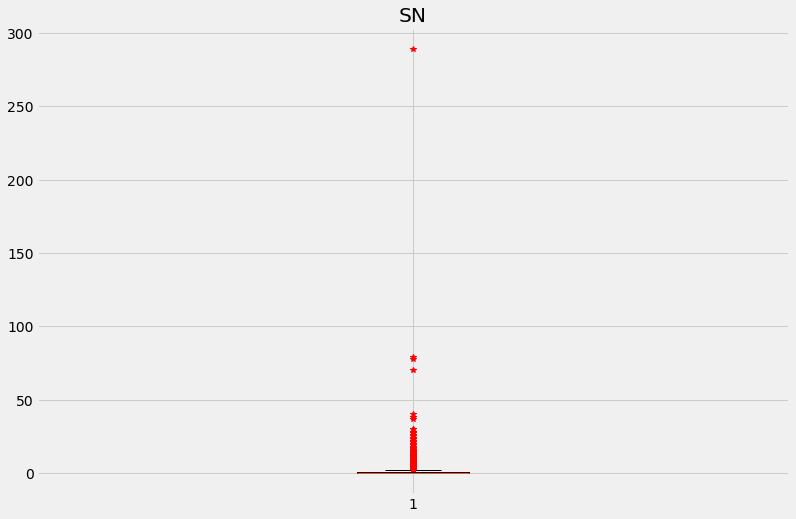

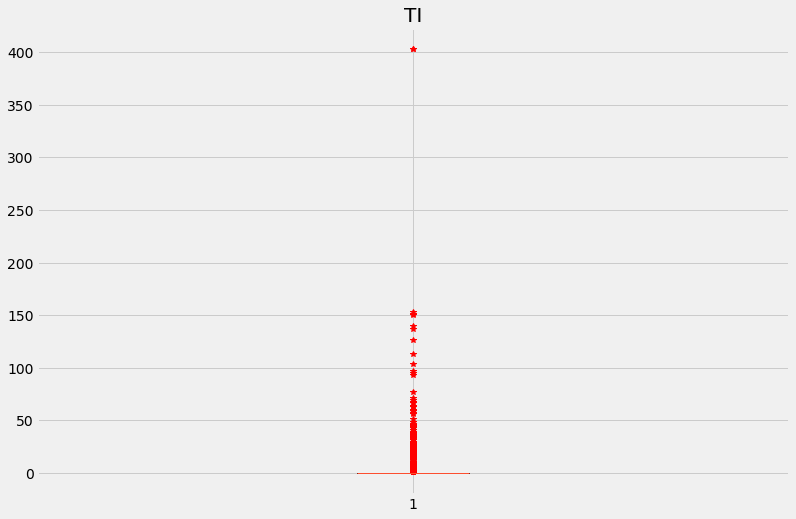

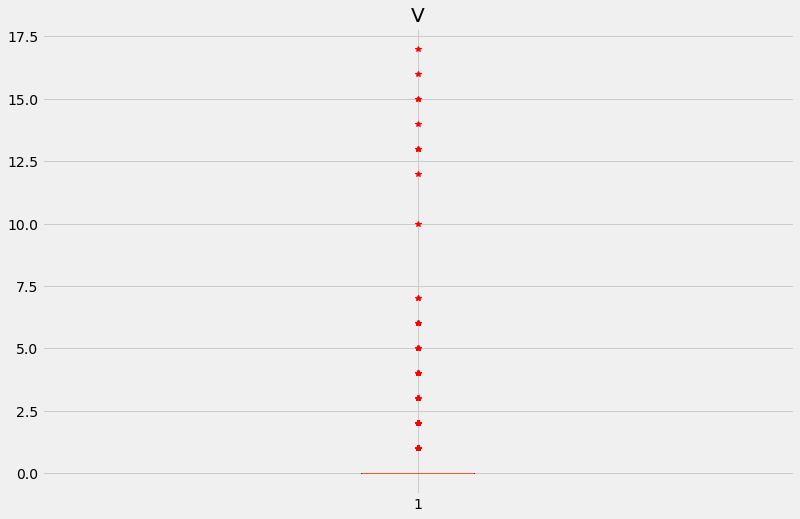

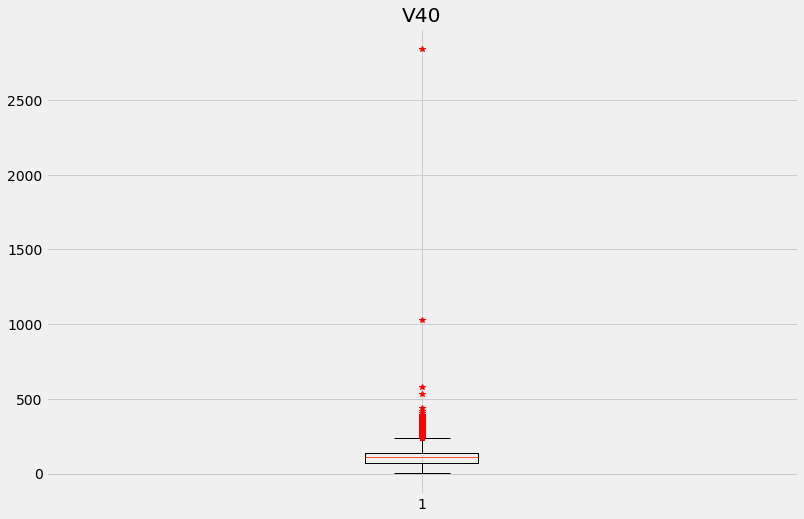

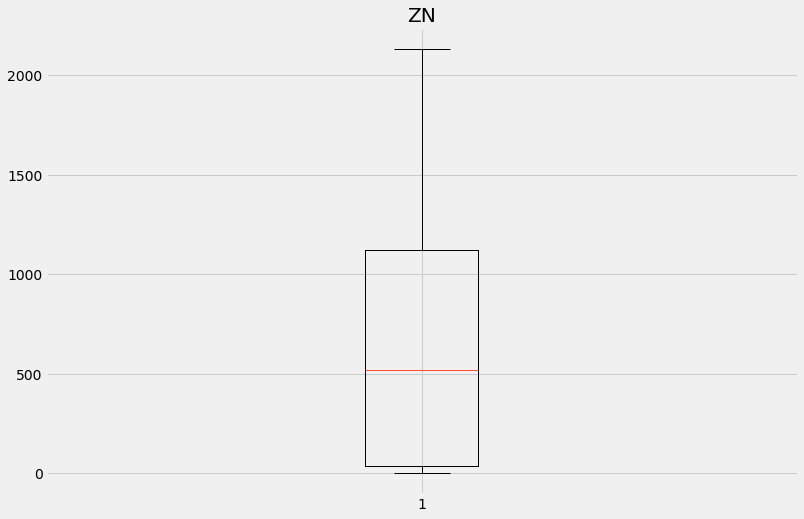

In [ ]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(train[col], sym='r*')
    plt.title(col)
    plt.show()

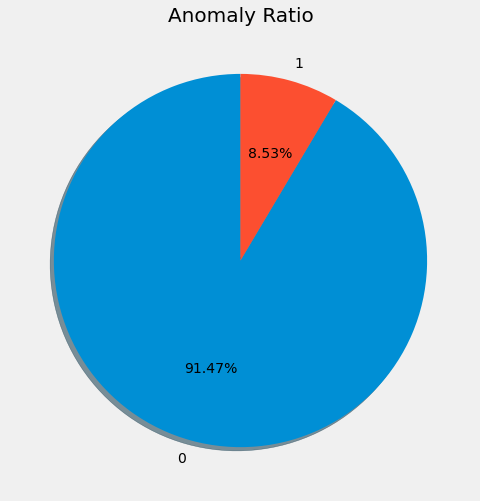

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(train['Y_LABEL'].value_counts(), labels = train['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Anomaly Ratio', size=20)
plt.show()

In [ ]:
# 이상치 유무에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['Y_LABEL']==0]
train_1 = train[train['Y_LABEL']==1]

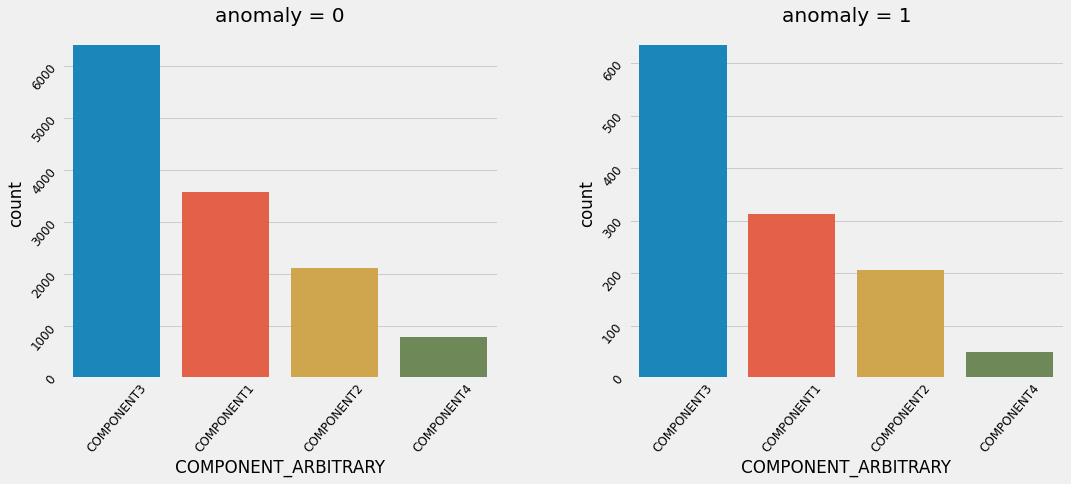

In [ ]:
# 'COMPONENT_ARBITRARY' #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'COMPONENT_ARBITRARY',
                data = train_0,
                ax = ax[0],
                order = train_0['COMPONENT_ARBITRARY'].value_counts().index)
ax[0].tick_params(labelsize=12)
ax[0].set_title('anomaly = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = train_1,
              ax = ax[1],
              order = train_1['COMPONENT_ARBITRARY'].value_counts().index)
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

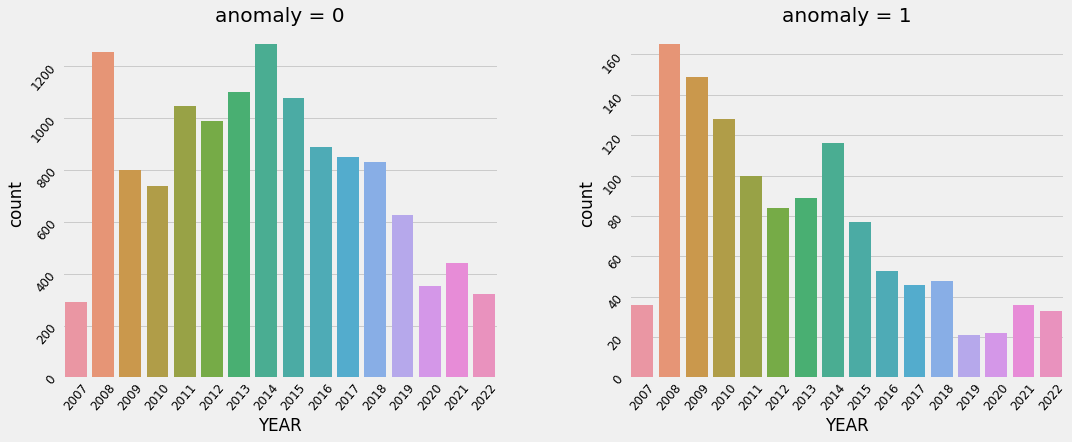

In [ ]:
# 'Year' #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'YEAR',
                data = train_0,
                ax = ax[0])
ax[0].tick_params(labelsize=12)
ax[0].set_title('anomaly = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'YEAR',
              data = train_1,
              ax = ax[1])
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
# Numerical 그래프 함수 정의
def num_plot(train, train_0, train_1, column):
  
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    if column in test_features :
        color = 'red'
    else :
        color = 'blue'

    sns.distplot(train_0[column], color = color,
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('anomaly = 0')
    axes[0].set_ylabel('count')
    axes[0].set_xlim(None,train[column].max())

    sns.distplot(train_1[column], color = color,
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('anomaly = 1')
    axes[1].set_ylabel('count')
    axes[1].set_xlim(None,train[column].max())


    plt.subplots_adjust(wspace=0.3, hspace=0.3)

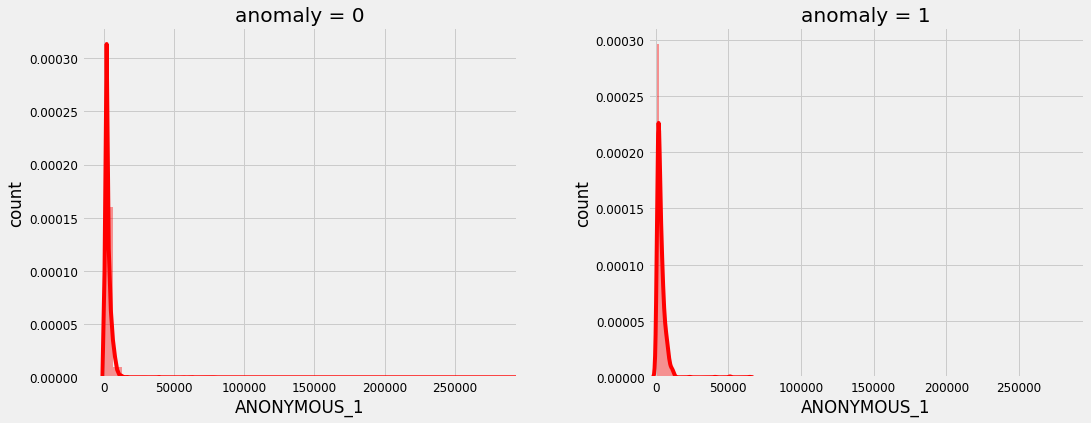

In [ ]:
num_plot(train, train_0, train_1,'ANONYMOUS_1')


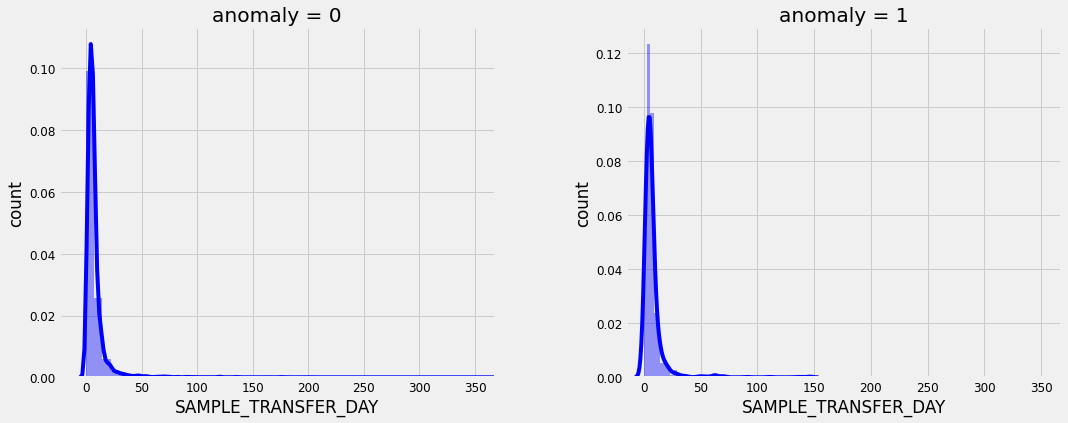

In [ ]:
num_plot(train, train_0, train_1,'SAMPLE_TRANSFER_DAY')


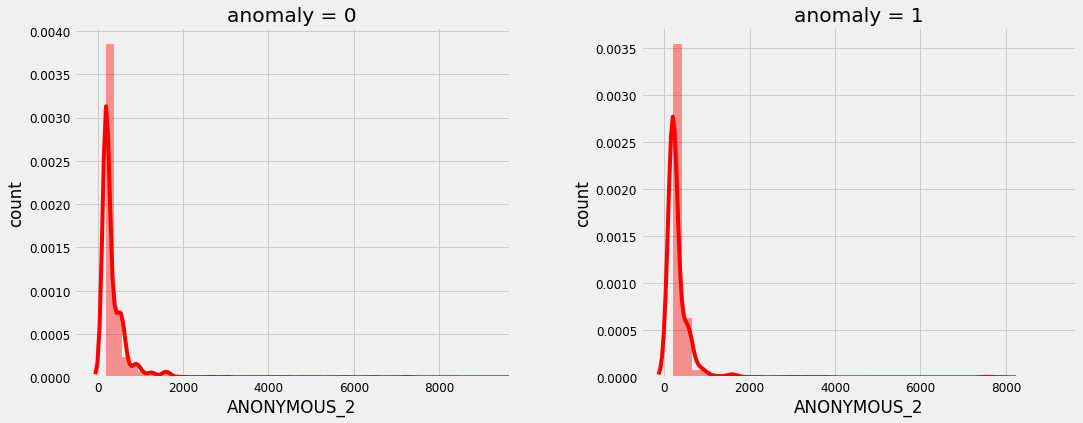

In [ ]:
num_plot(train, train_0, train_1,'ANONYMOUS_2')


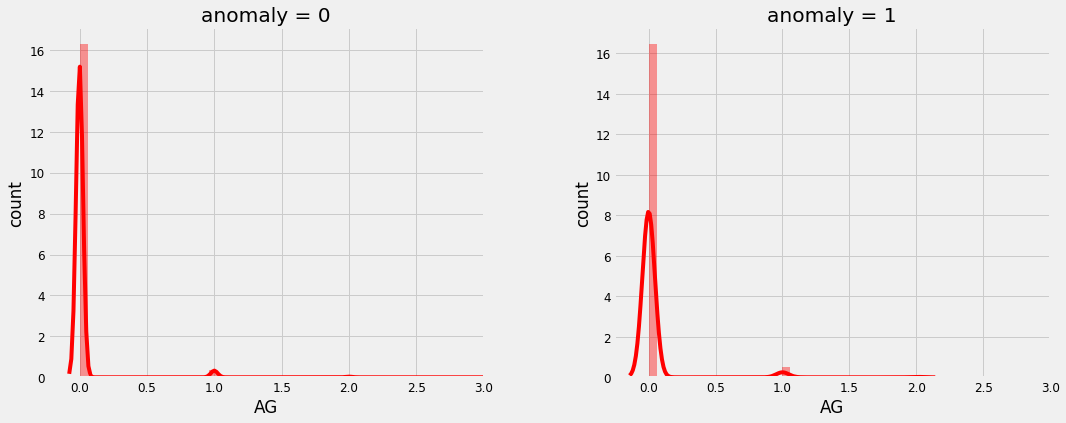

In [ ]:
num_plot(train, train_0, train_1,'AG')


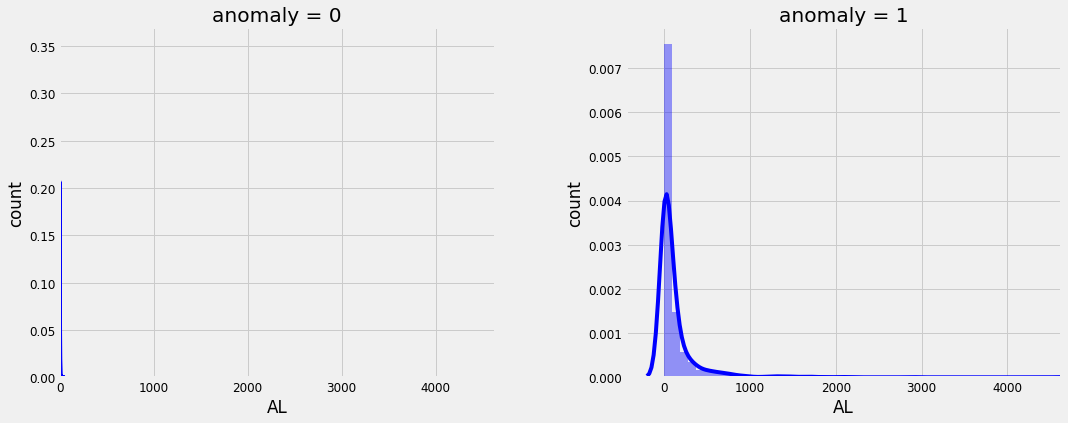

In [ ]:
num_plot(train, train_0, train_1,'AL')


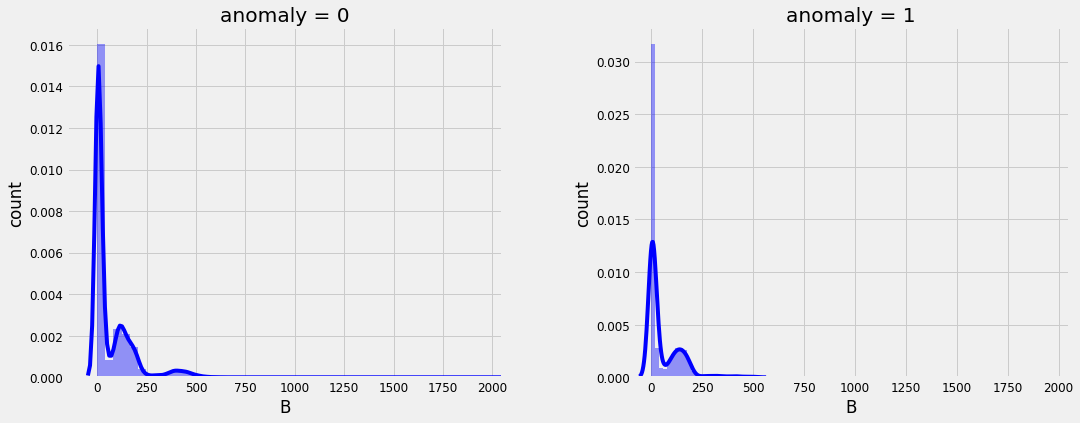

In [ ]:
num_plot(train, train_0, train_1,'B')


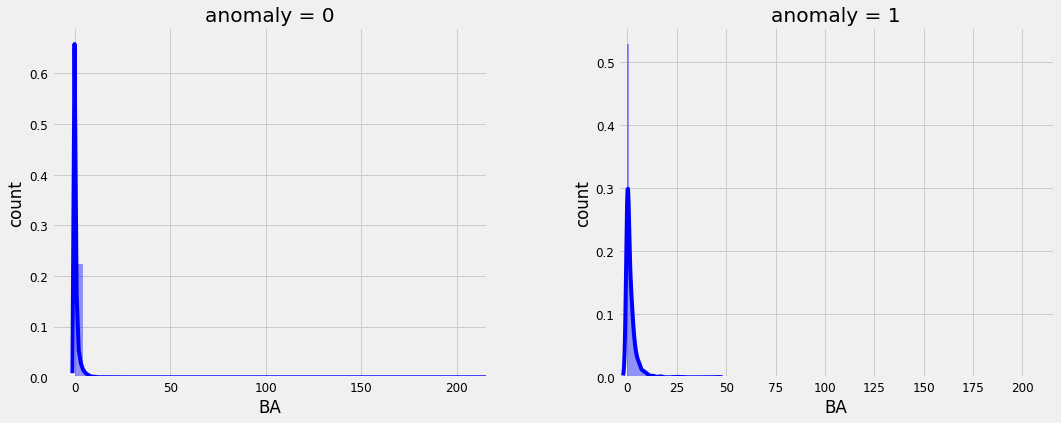

In [ ]:
num_plot(train, train_0, train_1,'BA')


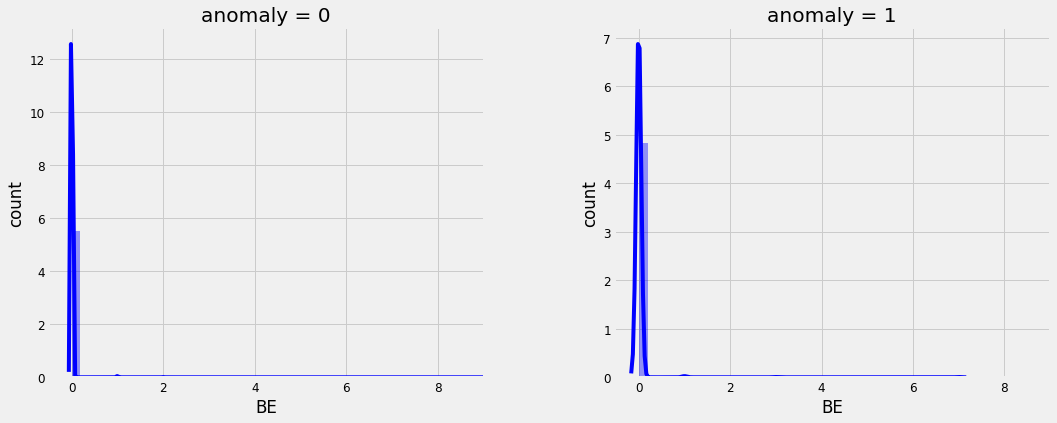

In [ ]:
num_plot(train, train_0, train_1,'BE')


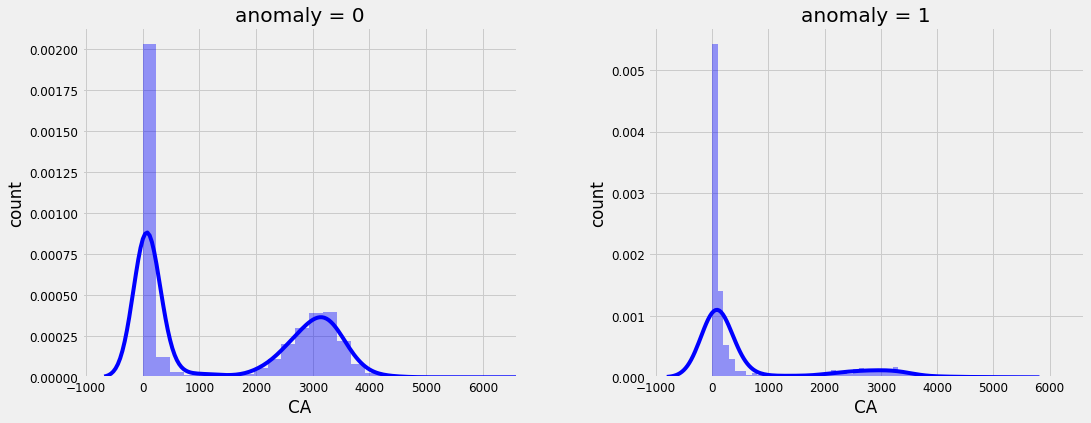

In [ ]:
num_plot(train, train_0, train_1,'CA')


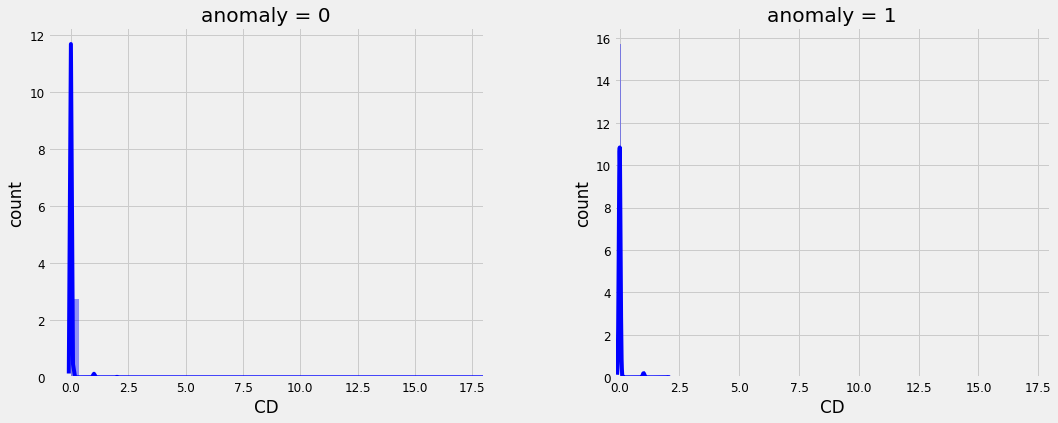

In [ ]:
num_plot(train, train_0, train_1,'CD')


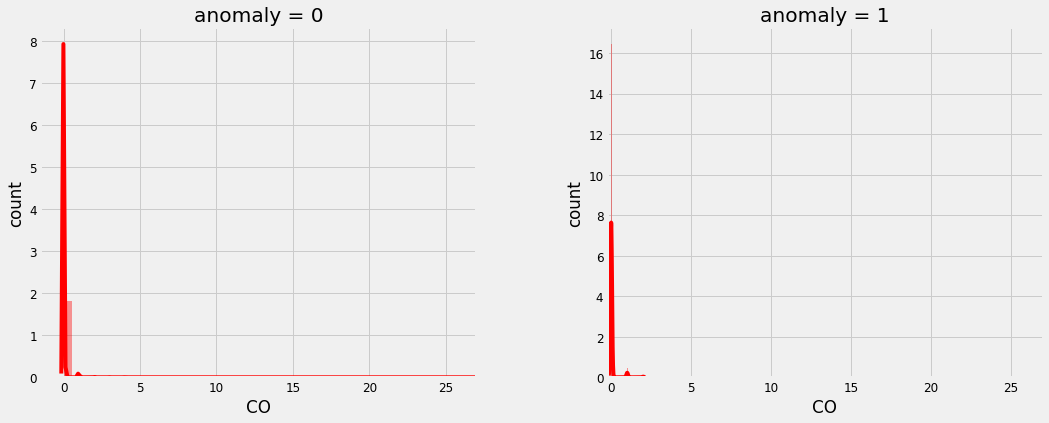

In [ ]:
num_plot(train, train_0, train_1,'CO')


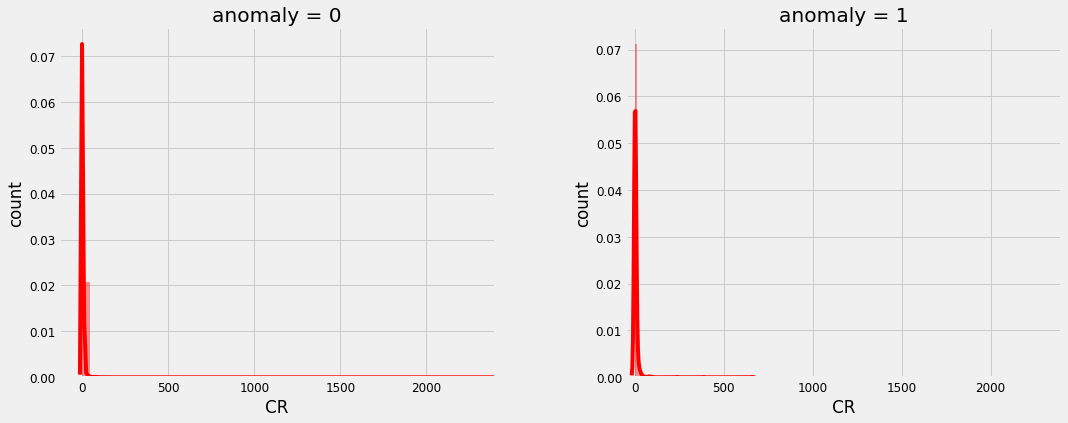

In [ ]:
num_plot(train, train_0, train_1,'CR')


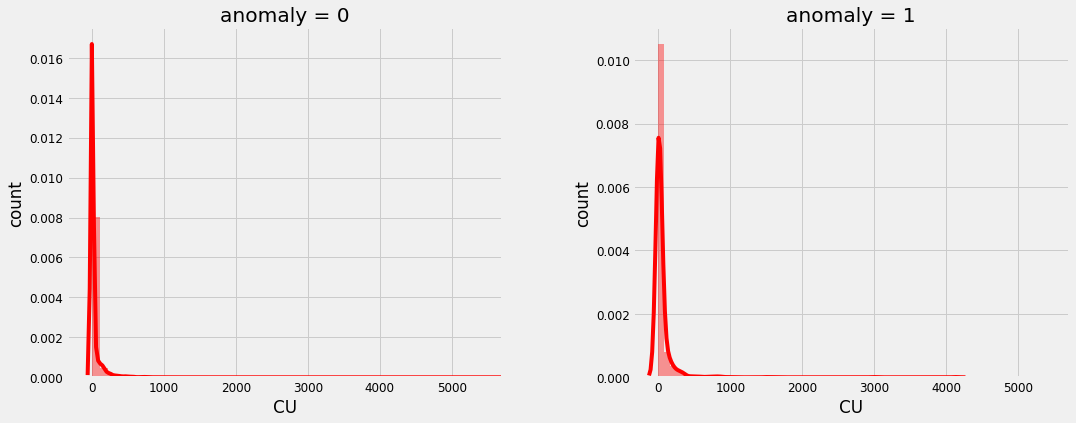

In [ ]:
num_plot(train, train_0, train_1,'CU')


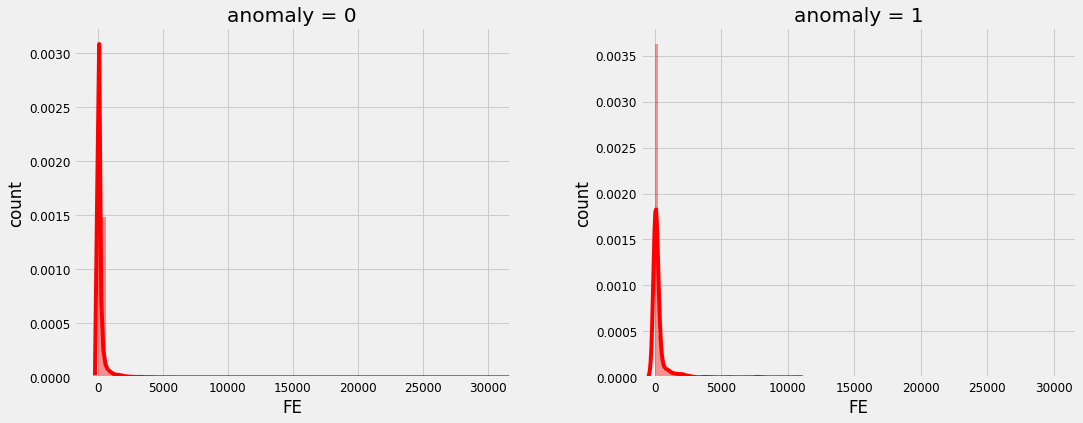

In [ ]:
num_plot(train, train_0, train_1,'FE')


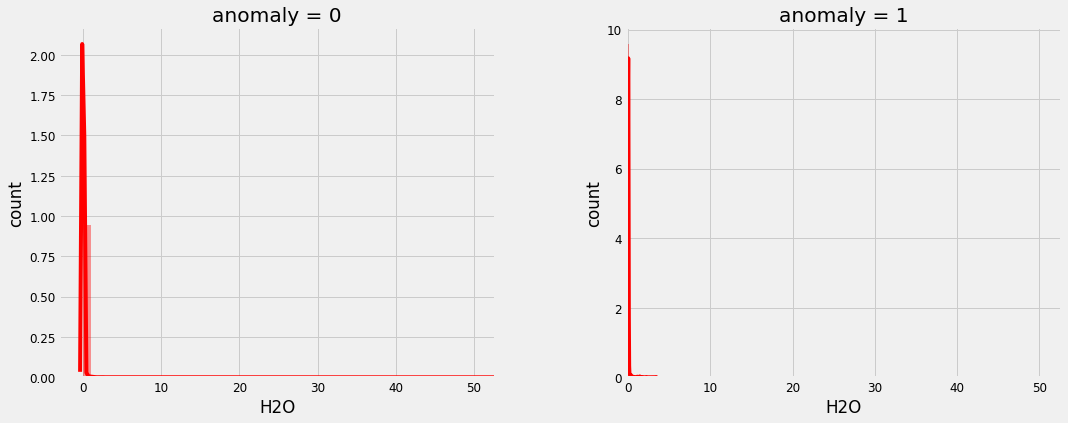

In [ ]:
num_plot(train, train_0, train_1,'H2O')


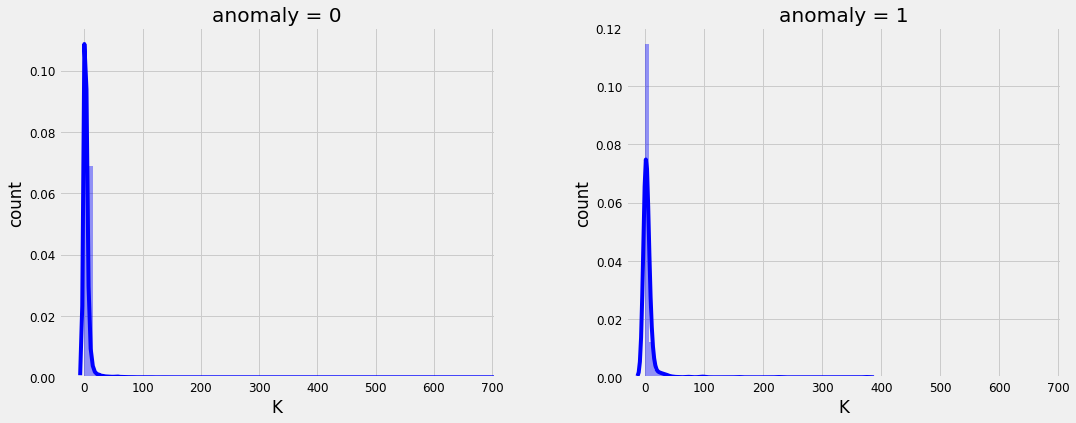

In [ ]:
num_plot(train, train_0, train_1,'K')


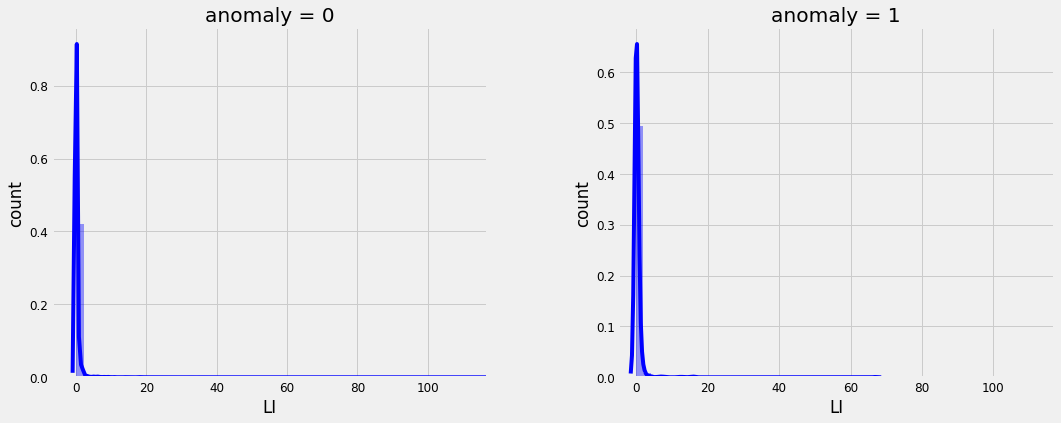

In [ ]:
num_plot(train, train_0, train_1,'LI')


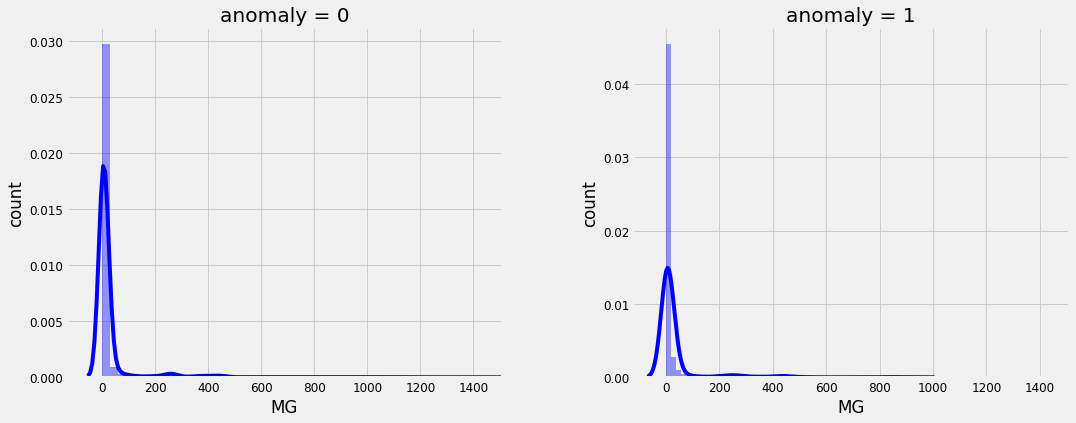

In [ ]:
num_plot(train, train_0, train_1,'MG')


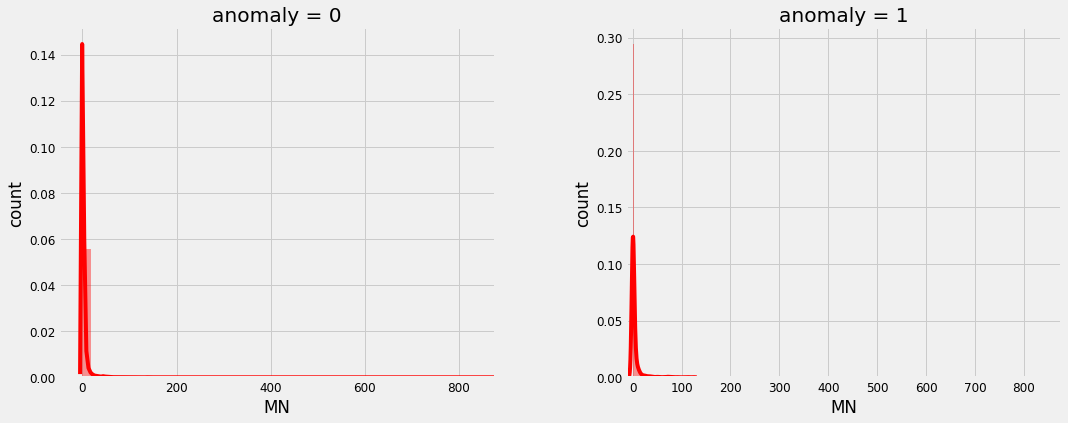

In [ ]:
num_plot(train, train_0, train_1,'MN')


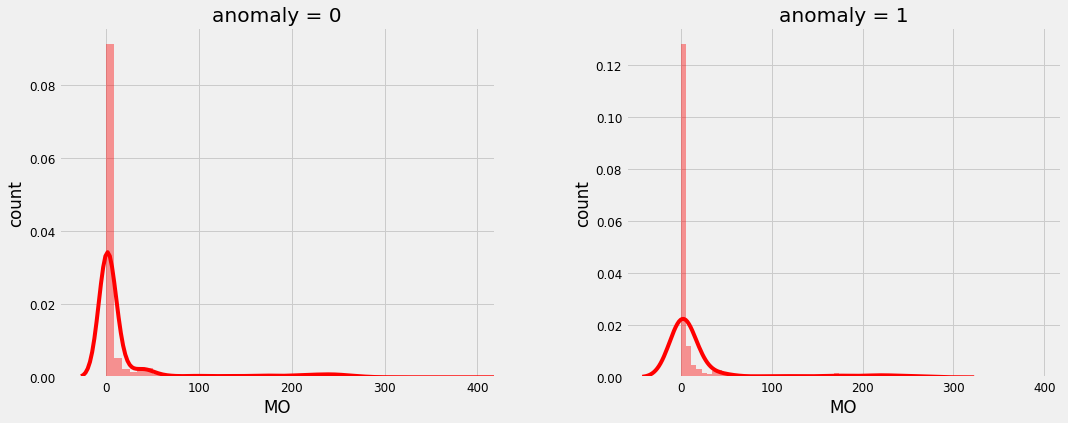

In [ ]:
num_plot(train, train_0, train_1,'MO')


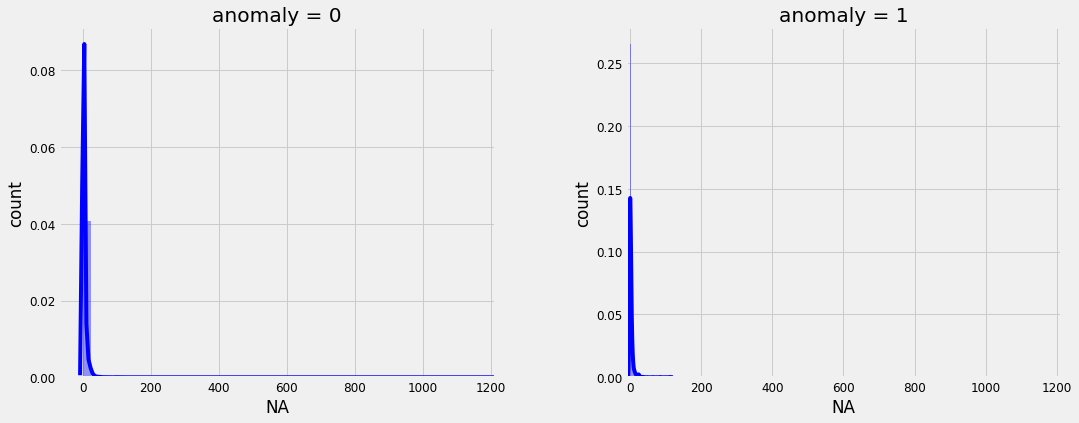

In [ ]:
num_plot(train, train_0, train_1,'NA')


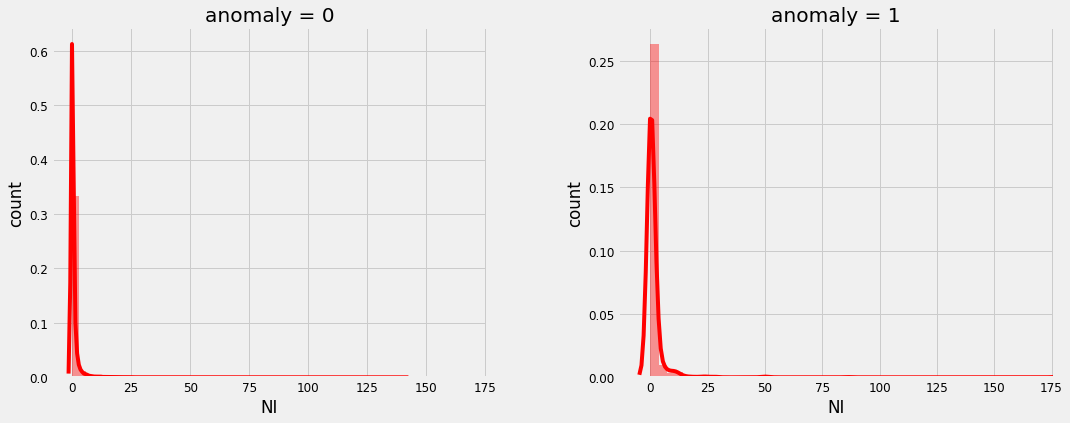

In [ ]:
num_plot(train, train_0, train_1,'NI')


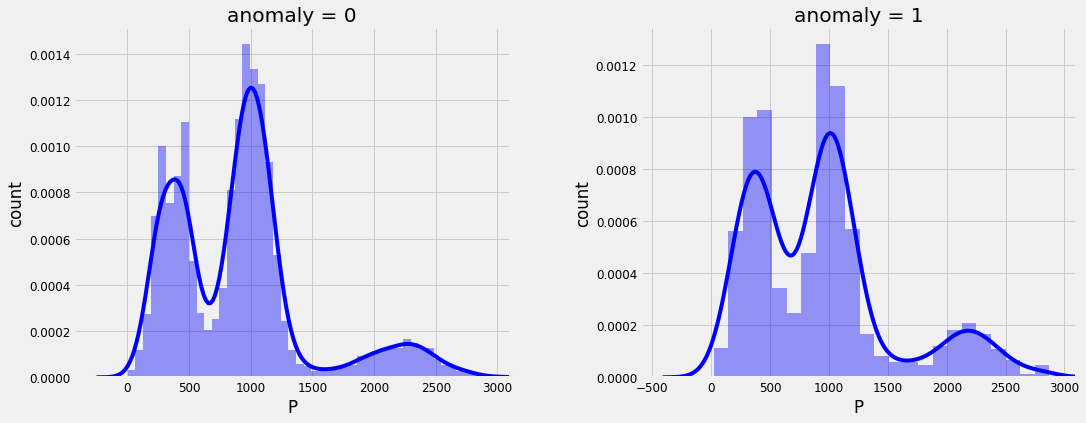

In [ ]:
num_plot(train, train_0, train_1,'P')


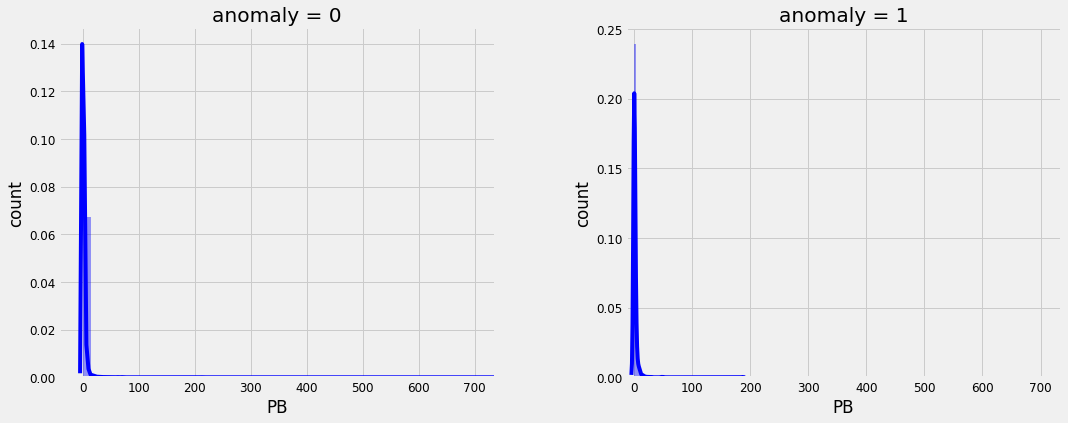

In [ ]:
num_plot(train, train_0, train_1,'PB')

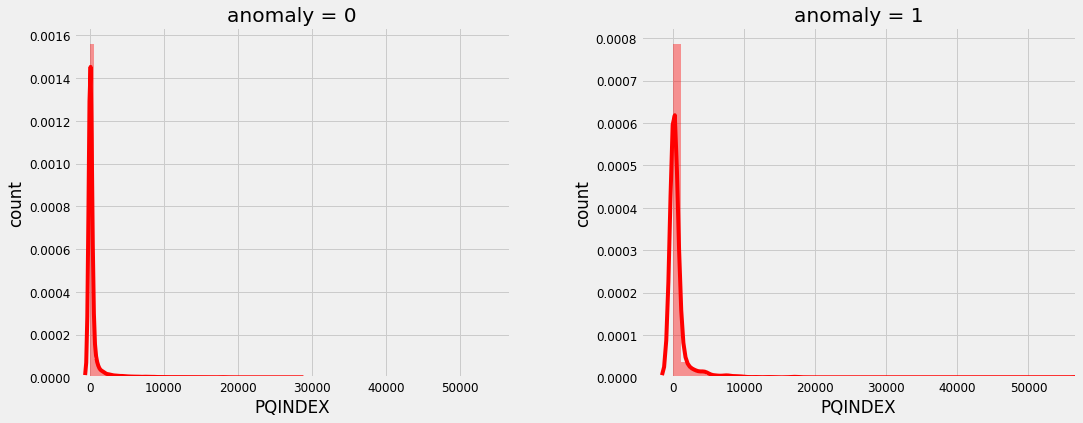

In [ ]:
num_plot(train, train_0, train_1,'PQINDEX')


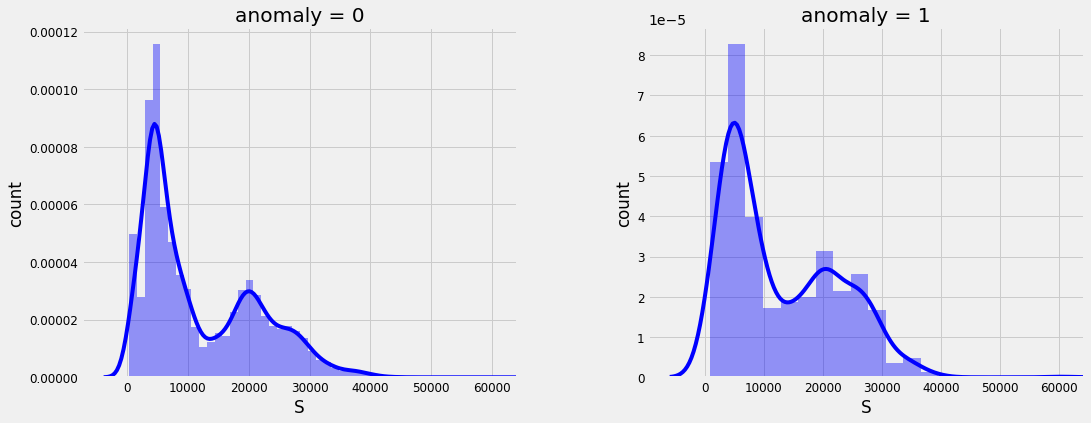

In [ ]:
num_plot(train, train_0, train_1,'S')


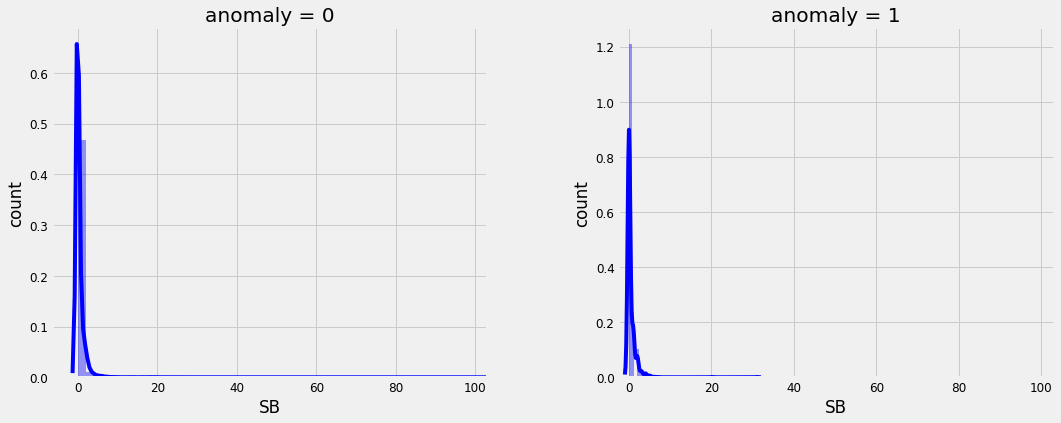

In [ ]:
num_plot(train, train_0, train_1,'SB')


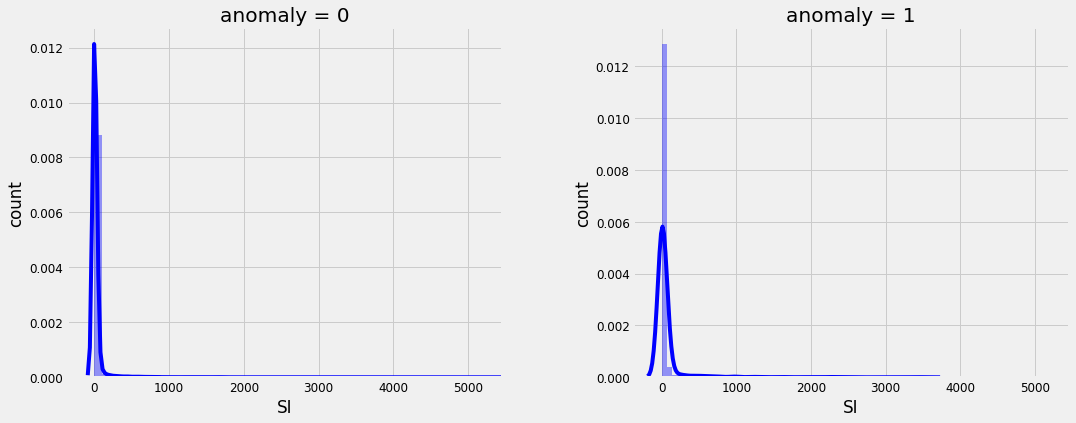

In [ ]:
num_plot(train, train_0, train_1,'SI')


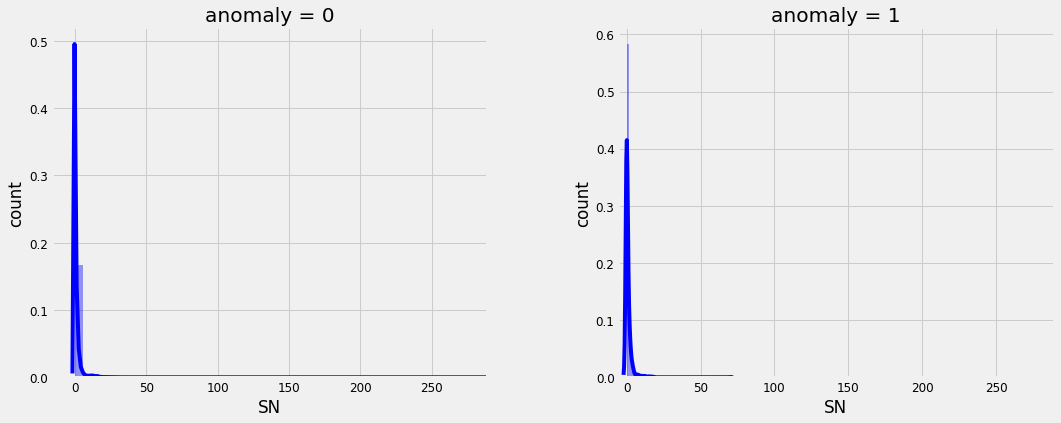

In [ ]:
num_plot(train, train_0, train_1,'SN')


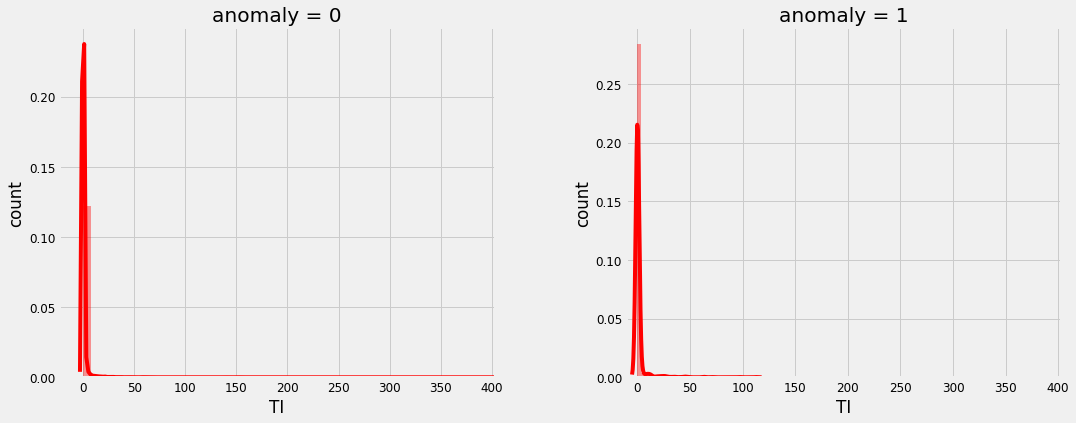

In [ ]:
num_plot(train, train_0, train_1,'TI')


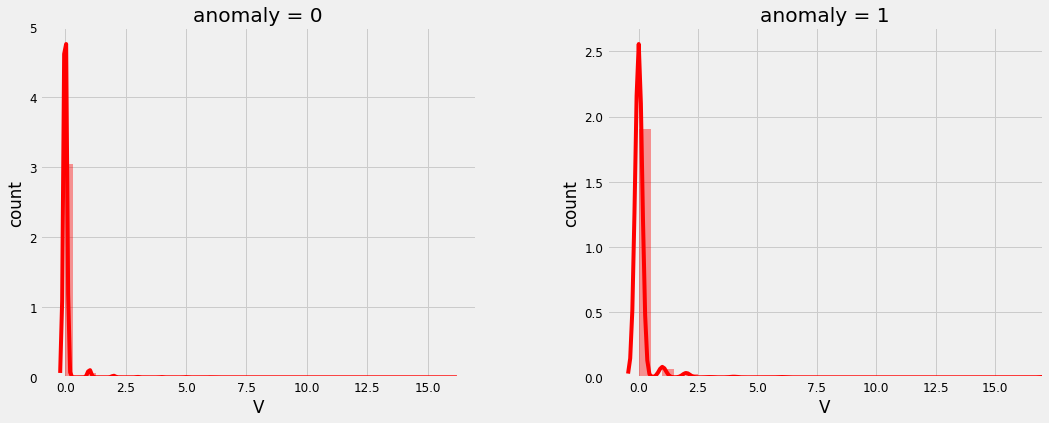

In [ ]:
num_plot(train, train_0, train_1,'V')


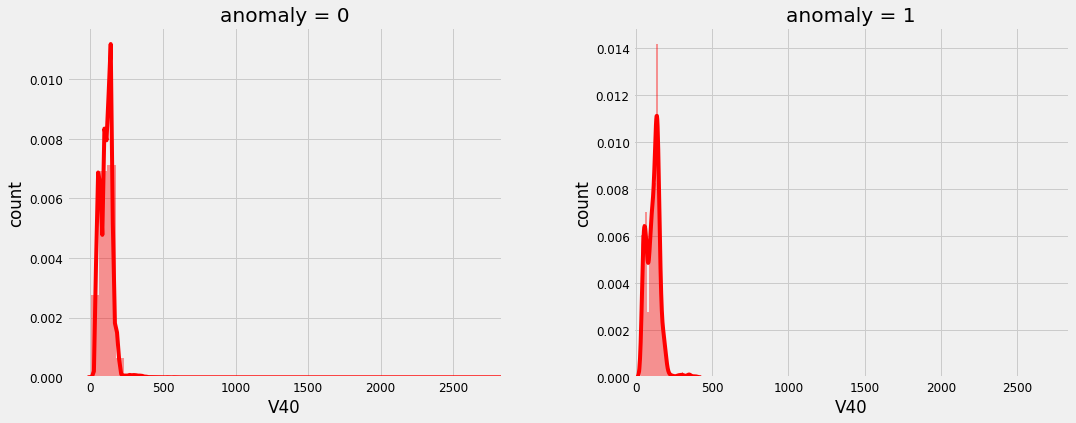

In [ ]:
num_plot(train, train_0, train_1,'V40')


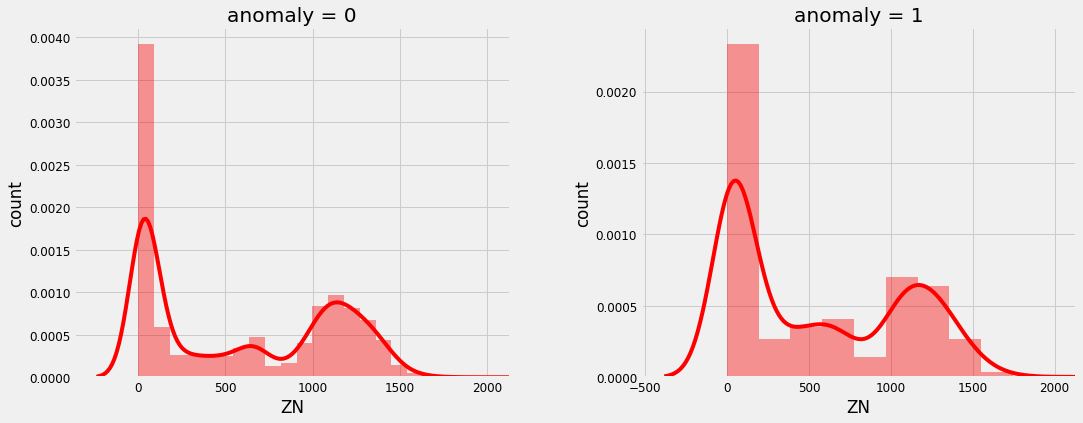

In [ ]:
num_plot(train, train_0, train_1,'ZN')


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [ ]:
train_corr = train.drop(train[categorical_features], axis=1)


In [ ]:
train_corr['Y_LABEL'] = train['Y_LABEL']
# Y_LABEL을 object형에서 int형으로 변환
train_corr = train_corr.astype({'Y_LABEL' : 'int'})
corr = train_corr.corr(method='pearson')

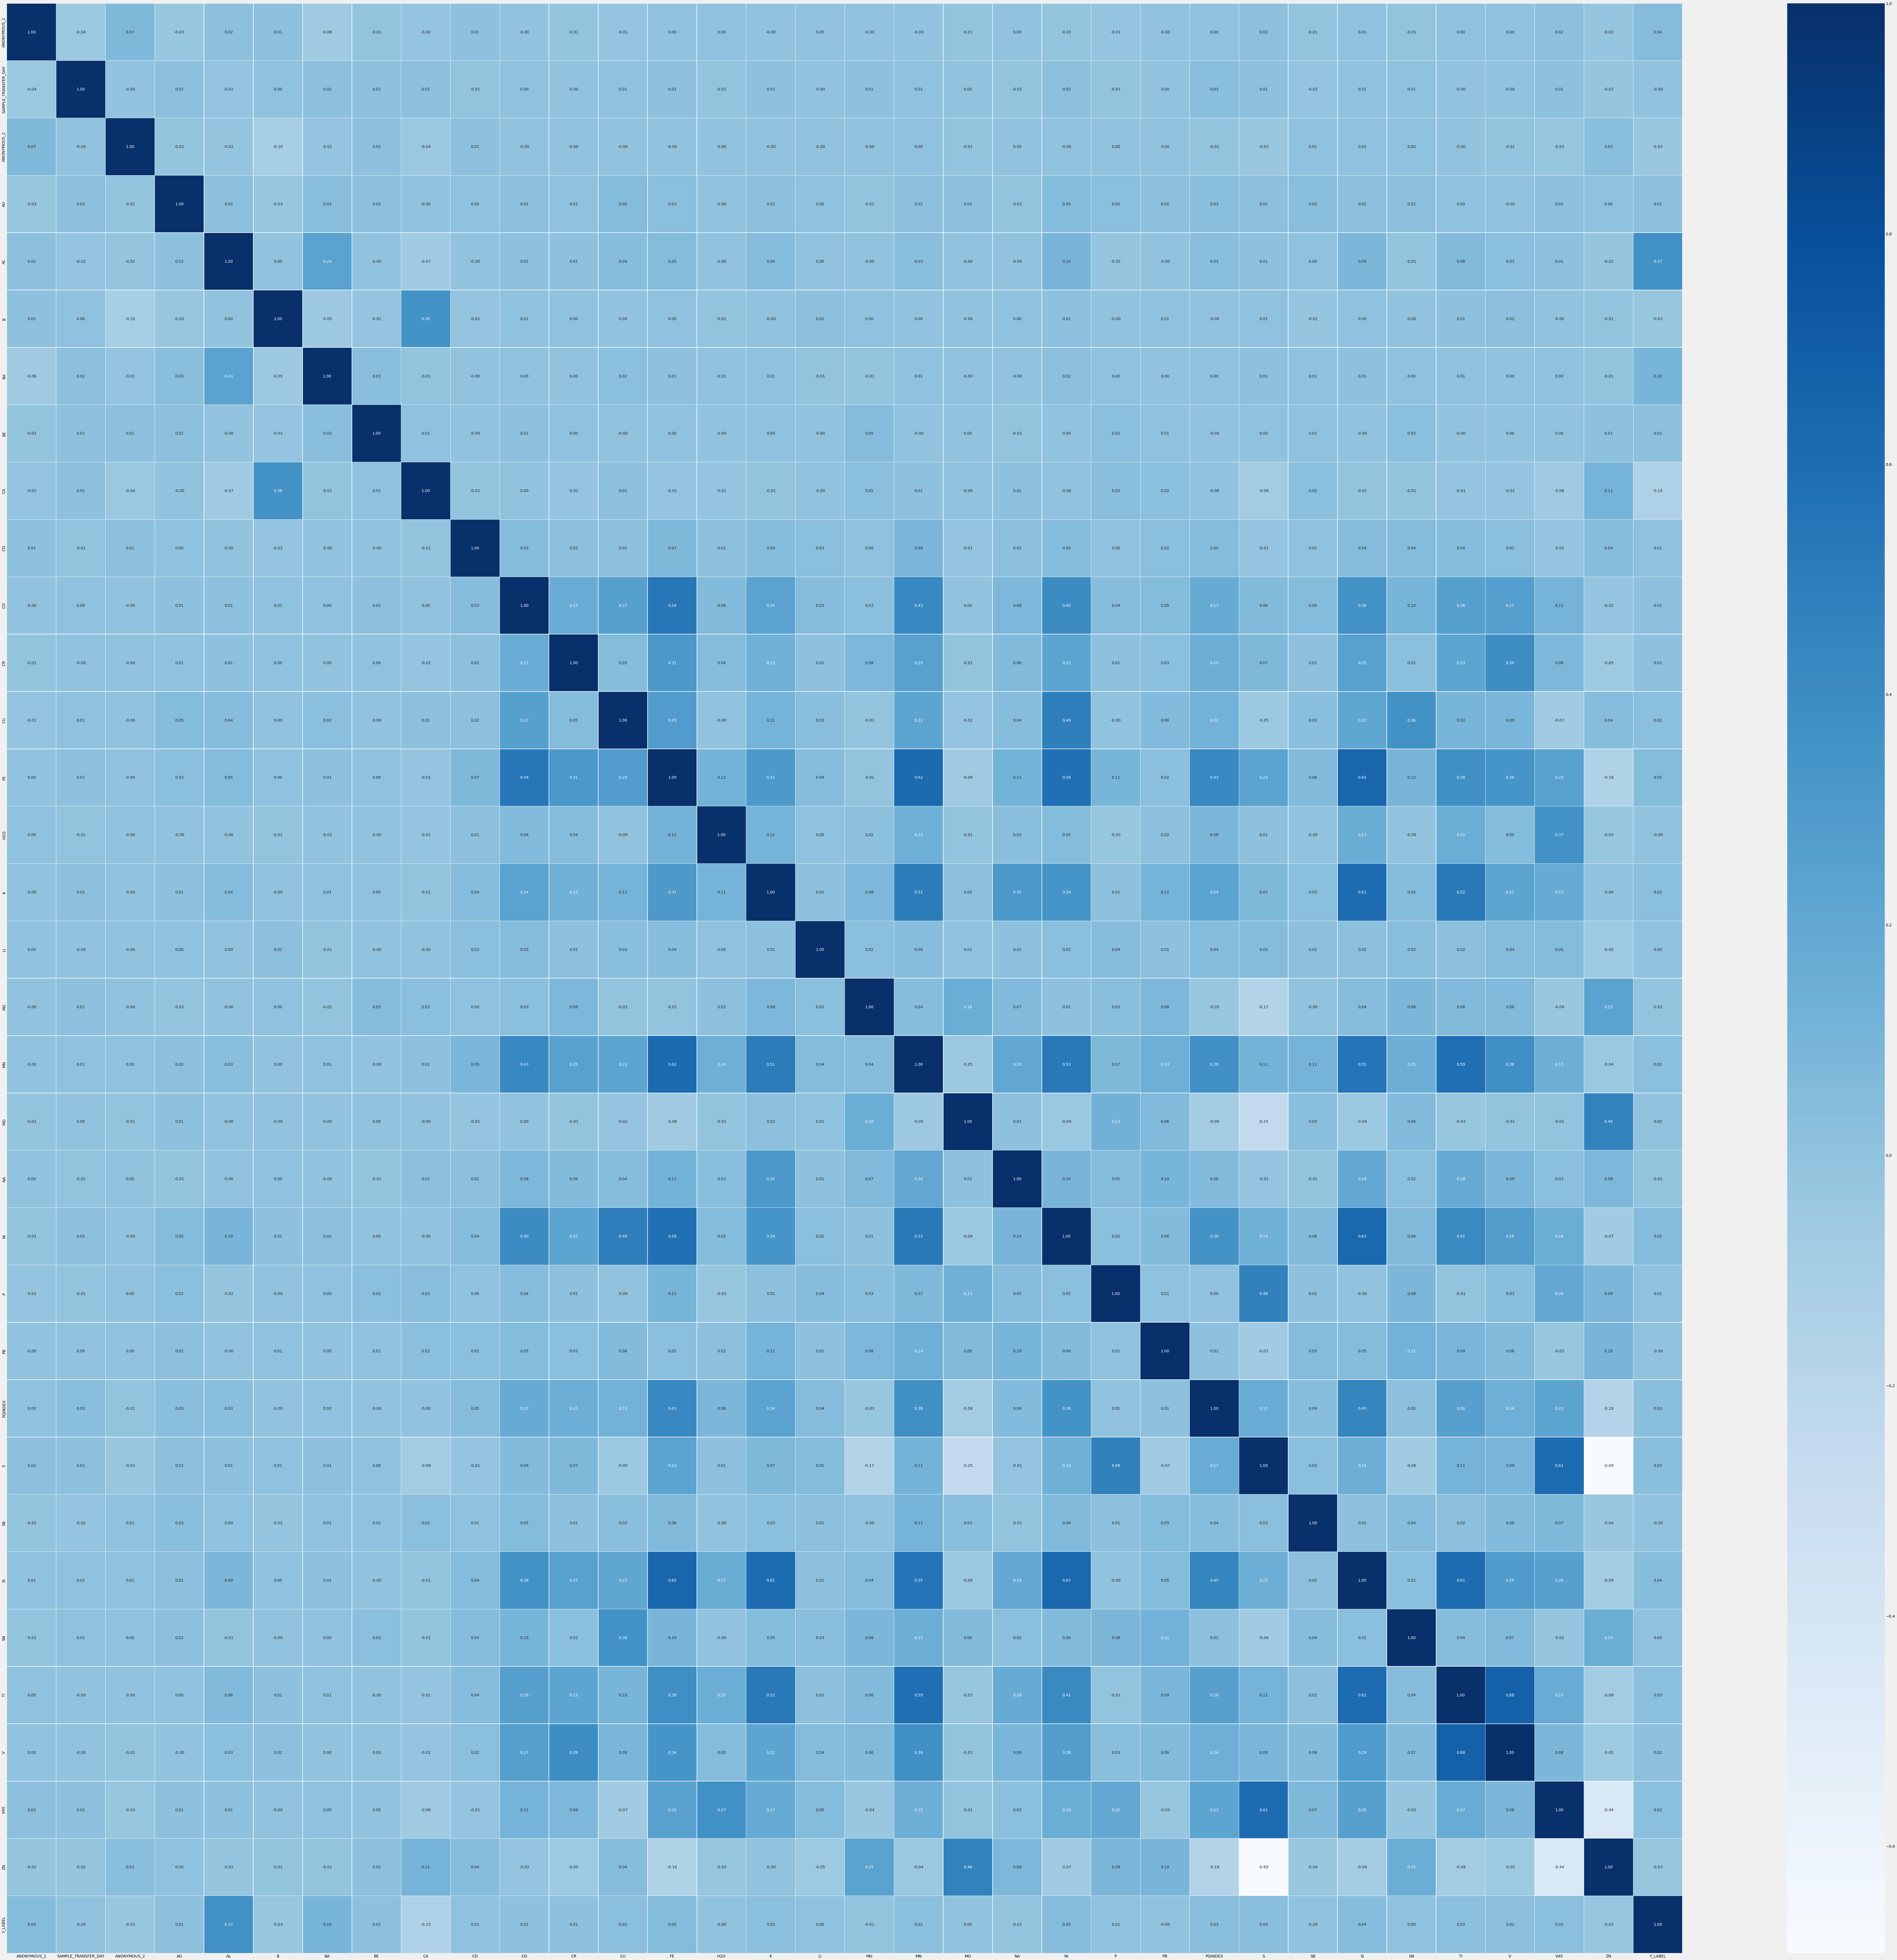

In [ ]:
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [ ]:
correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
train_temp.style.background_gradient(cmap='viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
PQINDEX,0.028966
S,0.027923
TI,0.025637


heatmap과 위의 표를 참고했을 때, Y_LABEL과 가장 연관성이 큰 feature는 AL이고 이는 알루미늄 함유량이 Y_LABEL, 즉 anolmaly 값에 가장 많은 영향을 미침을 알 수 있다. 하지만 관계계수의 값이 커 큰 영향을 끼친다고 할 수 없다.

또한 상관관계 분석에서는 Y_LABEL에 큰 영향을 주는 feature가 거의 없는 것을 확인할 수 있다.

정상치와 이상치의 비율이 지나치게 Imbalance하다.

'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.

주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.

train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.